In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reload the uploaded dataset
file_path = 'final_combined_data.csv'
df = pd.read_csv(file_path)

# --- Step 1: Clean and Convert Quantitative Features ---

# Clean military expenditure values (e.g., '227M' -> 227.0)
def convert_military_expenditure(value):
    if pd.isnull(value):
        return np.nan
    value = str(value).strip().upper().replace(",", "")
    if 'B' in value:
        return float(value.replace('B', '')) * 1000  # convert billions to millions
    if 'M' in value:
        return float(value.replace('M', ''))
    try:
        return float(value)
    except ValueError:
        return np.nan

df['Military_Expenditure_Clean'] = df['Military_Expenditure'].apply(convert_military_expenditure)

# Select numerical columns to normalize
numerical_cols = [
    'GII_Rank',
    'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
    'Mean age at first marriage, female',
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)'
]

# Impute missing numerical values with column mean
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# --- Step 2: Process Categorical Features ---

# Fill binary legislative columns with mode
binary_cols = [
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)'
]
df[binary_cols] = df[binary_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Binary encode treaty ratification (CEDAW and ATT): If year exists, then 1 else 0
df['CEDAW_Ratified'] = df['CEDAW'].notnull().astype(int)
df['ATT_Ratified'] = df['Arms_Trade_Treaty'].notnull().astype(int)

# --- Step 3: Combine and Clean Textual Features ---

# Combine major NAP textual components into one block for NLP use
text_columns = ['NAP_Summary', 'Objectives', 'Actions/Activities', 'Indicators', 'M&E', 'Budget', 'Disarmament']
df['NAP_Text'] = df[text_columns].fillna('').agg(' '.join, axis=1)

# Clean text (remove excessive whitespace, symbols)
import re
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces/newlines
    text = re.sub(r'[^\w\s.,;:!?\'"-]', '', text)  # remove unwanted characters
    return text.strip()

df['NAP_Text_Clean'] = df['NAP_Text'].apply(clean_text)

# Output preprocessed columns
preprocessed_df = df[[
    'Country',
    *numerical_cols,
    *binary_cols,
    'CEDAW_Ratified',
    'ATT_Ratified',
    'NAP_Text_Clean',
    'legislation'
]].copy()

preprocessed_df.head()


,Country,GII_Rank,Military_Expenditure_Clean,Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49),"Mean age at first marriage, female","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)",There is legislation on sexual harassment in employment (1=yes; 0=no),Women and men have equal ownership rights to immovable property (1=yes; 0=no),CEDAW_Ratified,ATT_Ratified,NAP_Text_Clean,legislation
0,Afghanistan,-2.779573e-16,-7.606715e-01,3.326808e+00,-1.280267e+00,0.000000,1.0,1.0,1,1,Afghanistan adopted its first National Action ...,Ministry of Women's Affairs: Institutional mec...
1,Albania,-1.718442e+00,-7.646712e-01,-7.952672e-01,-4.089027e-01,0.793908,1.0,1.0,1,1,Albania adopted its first National Action Plan...,Criminal Code Articles 100 to 108: Laws > Viol...
2,Algeria,-2.779573e-16,-1.254399e-16,-2.524923e-16,-2.293117e-15,0.000000,1.0,1.0,0,0,,Article 336 of the Penal Code: Laws > Violence...
3,Angola,-2.779573e-16,-1.254399e-16,1.905403e+00,-1.280267e+00,-1.310629,1.0,1.0,0,0,Angola adopted its first National Action Plan ...,Campagne nationale contre les violences faites...
4,Antigua and Barbuda,-2.779573e-16,-1.254399e-16,-2.524923e-16,-2.293117e-15,0.000000,0.0,1.0,0,0,,Section 6 of the Constitution: Laws > Violence...


## Setup

In [ ]:
country_region_map = {
    # North America
    "Canada": "North America",
    "United States": "North America",
    "Mexico": "North America",

    # Latin America & Caribbean
    "Argentina": "Latin America & Caribbean",
    "Brazil": "Latin America & Caribbean",
    "Chile": "Latin America & Caribbean",
    "Colombia": "Latin America & Caribbean",
    "Cuba": "Latin America & Caribbean",
    "Dominican Republic": "Latin America & Caribbean",
    "Ecuador": "Latin America & Caribbean",
    "El Salvador": "Latin America & Caribbean",
    "Guatemala": "Latin America & Caribbean",
    "Honduras": "Latin America & Caribbean",
    "Jamaica": "Latin America & Caribbean",
    "Nicaragua": "Latin America & Caribbean",
    "Panama": "Latin America & Caribbean",
    "Paraguay": "Latin America & Caribbean",
    "Peru": "Latin America & Caribbean",
    "Uruguay": "Latin America & Caribbean",
    "Venezuela": "Latin America & Caribbean",
    "Trinidad and Tobago": "Latin America & Caribbean",
    "Antigua and Barbuda": "Latin America & Caribbean",
    "Bahamas": "Latin America & Caribbean",
    "Barbados": "Latin America & Caribbean",
    "Grenada": "Latin America & Caribbean",
    "Saint Lucia": "Latin America & Caribbean",
    "Saint Vincent and the Grenadines": "Latin America & Caribbean",

    # Western Europe
    "Austria": "Western Europe",
    "Belgium": "Western Europe",
    "France": "Western Europe",
    "Germany": "Western Europe",
    "Ireland": "Western Europe",
    "Italy": "Western Europe",
    "Netherlands": "Western Europe",
    "Portugal": "Western Europe",
    "Spain": "Western Europe",
    "Switzerland": "Western Europe",
    "United Kingdom": "Western Europe",
    "Luxembourg": "Western Europe",

    # Eastern Europe & Central Asia
    "Albania": "Eastern Europe & Central Asia",
    "Armenia": "Eastern Europe & Central Asia",
    "Azerbaijan": "Eastern Europe & Central Asia",
    "Belarus": "Eastern Europe & Central Asia",
    "Bosnia and Herzegovina": "Eastern Europe & Central Asia",
    "Bulgaria": "Eastern Europe & Central Asia",
    "Croatia": "Eastern Europe & Central Asia",
    "Czech Republic": "Eastern Europe & Central Asia",
    "Estonia": "Eastern Europe & Central Asia",
    "Georgia": "Eastern Europe & Central Asia",
    "Hungary": "Eastern Europe & Central Asia",
    "Kazakhstan": "Eastern Europe & Central Asia",
    "Kyrgyzstan": "Eastern Europe & Central Asia",
    "Latvia": "Eastern Europe & Central Asia",
    "Lithuania": "Eastern Europe & Central Asia",
    "Moldova": "Eastern Europe & Central Asia",
    "Montenegro": "Eastern Europe & Central Asia",
    "North Macedonia": "Eastern Europe & Central Asia",
    "Poland": "Eastern Europe & Central Asia",
    "Romania": "Eastern Europe & Central Asia",
    "Russia": "Eastern Europe & Central Asia",
    "Serbia": "Eastern Europe & Central Asia",
    "Slovakia": "Eastern Europe & Central Asia",
    "Slovenia": "Eastern Europe & Central Asia",
    "Tajikistan": "Eastern Europe & Central Asia",
    "Turkmenistan": "Eastern Europe & Central Asia",
    "Ukraine": "Eastern Europe & Central Asia",
    "Uzbekistan": "Eastern Europe & Central Asia",

    # Sub-Saharan Africa
    "Angola": "Sub-Saharan Africa",
    "Benin": "Sub-Saharan Africa",
    "Botswana": "Sub-Saharan Africa",
    "Burkina Faso": "Sub-Saharan Africa",
    "Burundi": "Sub-Saharan Africa",
    "Cabo Verde": "Sub-Saharan Africa",
    "Cameroon": "Sub-Saharan Africa",
    "Central African Republic": "Sub-Saharan Africa",
    "Chad": "Sub-Saharan Africa",
    "Comoros": "Sub-Saharan Africa",
    "Congo (Brazzaville)": "Sub-Saharan Africa",
    "Congo (Kinshasa)": "Sub-Saharan Africa",
    "Côte d'Ivoire": "Sub-Saharan Africa",
    "Djibouti": "Sub-Saharan Africa",
    "Equatorial Guinea": "Sub-Saharan Africa",
    "Eritrea": "Sub-Saharan Africa",
    "Eswatini": "Sub-Saharan Africa",
    "Ethiopia": "Sub-Saharan Africa",
    "Gabon": "Sub-Saharan Africa",
    "Gambia": "Sub-Saharan Africa",
    "Ghana": "Sub-Saharan Africa",
    "Guinea": "Sub-Saharan Africa",
    "Guinea-Bissau": "Sub-Saharan Africa",
    "Kenya": "Sub-Saharan Africa",
    "Lesotho": "Sub-Saharan Africa",
    "Liberia": "Sub-Saharan Africa",
    "Madagascar": "Sub-Saharan Africa",
    "Malawi": "Sub-Saharan Africa",
    "Mali": "Sub-Saharan Africa",
    "Mauritania": "Sub-Saharan Africa",
    "Mauritius": "Sub-Saharan Africa",
    "Mozambique": "Sub-Saharan Africa",
    "Namibia": "Sub-Saharan Africa",
    "Niger": "Sub-Saharan Africa",
    "Nigeria": "Sub-Saharan Africa",
    "Rwanda": "Sub-Saharan Africa",
    "São Tomé and Príncipe": "Sub-Saharan Africa",
    "Senegal": "Sub-Saharan Africa",
    "Seychelles": "Sub-Saharan Africa",
    "Sierra Leone": "Sub-Saharan Africa",
    "Somalia": "Sub-Saharan Africa",
    "South Africa": "Sub-Saharan Africa",
    "South Sudan": "Sub-Saharan Africa",
    "Sudan": "Sub-Saharan Africa",
    "Tanzania": "Sub-Saharan Africa",
    "Togo": "Sub-Saharan Africa",
    "Uganda": "Sub-Saharan Africa",
    "Zambia": "Sub-Saharan Africa",
    "Zimbabwe": "Sub-Saharan Africa",

    # Middle East & North Africa
    "Algeria": "Middle East & North Africa",
    "Bahrain": "Middle East & North Africa",
    "Egypt": "Middle East & North Africa",
    "Iran": "Middle East & North Africa",
    "Iraq": "Middle East & North Africa",
    "Israel": "Middle East & North Africa",
    "Jordan": "Middle East & North Africa",
    "Kuwait": "Middle East & North Africa",
    "Lebanon": "Middle East & North Africa",
    "Libya": "Middle East & North Africa",
    "Morocco": "Middle East & North Africa",
    "Oman": "Middle East & North Africa",
    "Qatar": "Middle East & North Africa",
    "Saudi Arabia": "Middle East & North Africa",
    "Syria": "Middle East & North Africa",
    "Tunisia": "Middle East & North Africa",
    "Turkey": "Middle East & North Africa",
    "United Arab Emirates": "Middle East & North Africa",
    "Yemen": "Middle East & North Africa",

    # South Asia
    "Afghanistan": "South Asia",
    "Bangladesh": "South Asia",
    "Bhutan": "South Asia",
    "India": "South Asia",
    "Maldives": "South Asia",
    "Nepal": "South Asia",
    "Pakistan": "South Asia",
    "Sri Lanka": "South Asia",

    # East Asia & Pacific
    "Australia": "East Asia & Pacific",
    "Brunei": "East Asia & Pacific",
    "Cambodia": "East Asia & Pacific",
    "China": "East Asia & Pacific",
    "Fiji": "East Asia & Pacific",
    "Indonesia": "East Asia & Pacific",
    "Japan": "East Asia & Pacific",
    "Kiribati": "East Asia & Pacific",
    "Korea, Rep.": "East Asia & Pacific",
    "Lao PDR": "East Asia & Pacific",
    "Malaysia": "East Asia & Pacific",
    "Marshall Islands": "East Asia & Pacific",
    "Micronesia": "East Asia & Pacific",
    "Mongolia": "East Asia & Pacific",
    "Myanmar": "East Asia & Pacific",
    "New Zealand": "East Asia & Pacific",
    "Papua New Guinea": "East Asia & Pacific",
    "Philippines": "East Asia & Pacific",
    "Samoa": "East Asia & Pacific",
    "Singapore": "East Asia & Pacific",
    "Solomon Islands": "East Asia & Pacific",
    "Thailand": "East Asia & Pacific",
    "Timor-Leste": "East Asia & Pacific",
    "Tonga": "East Asia & Pacific",
    "Tuvalu": "East Asia & Pacific",
    "Vanuatu": "East Asia & Pacific",
    "Vietnam": "East Asia & Pacific"
}

## Region mapping

In [ ]:
preprocessed_df['Region'] = preprocessed_df['Country'].map(country_region_map)

## Plots

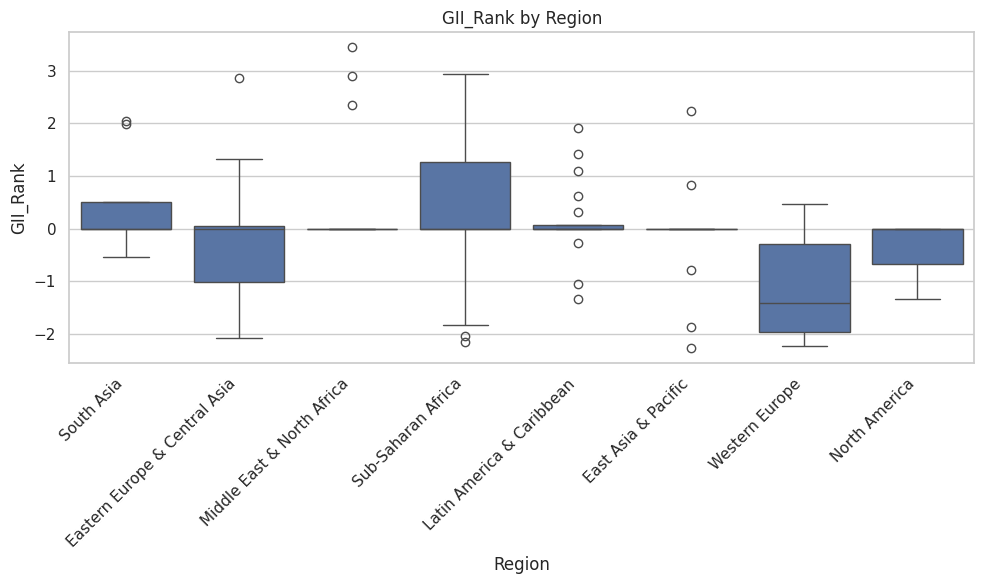

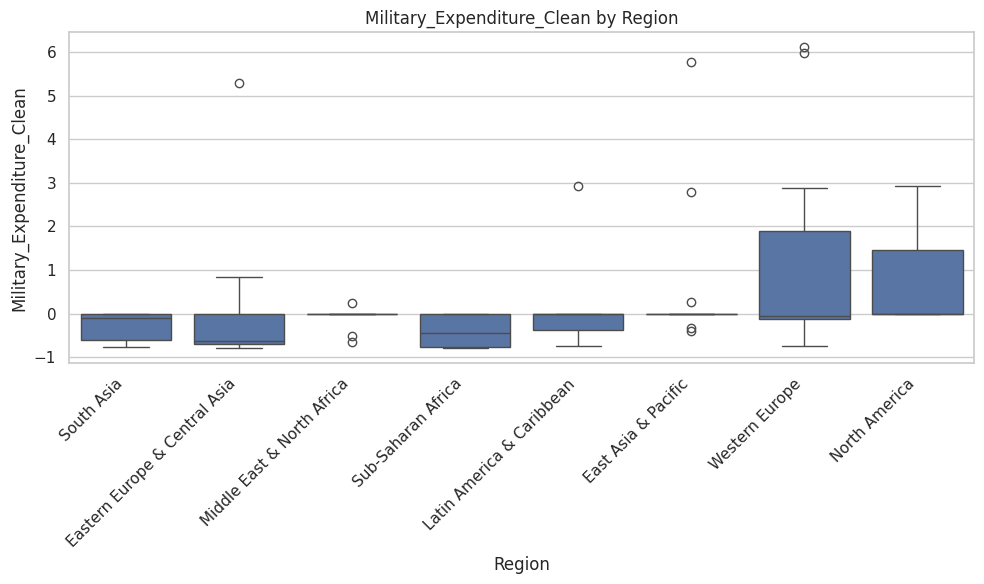

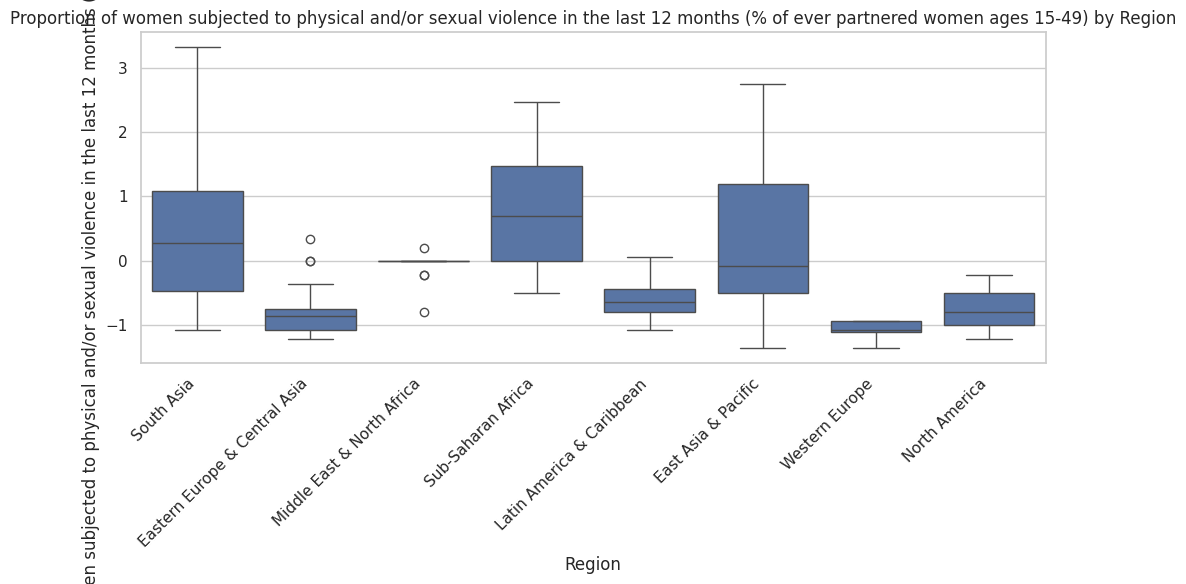

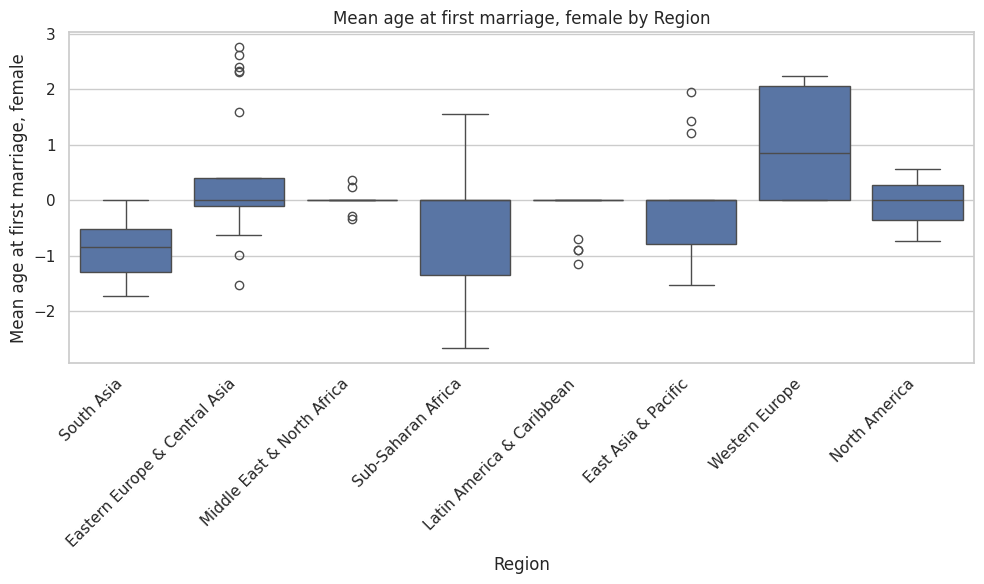

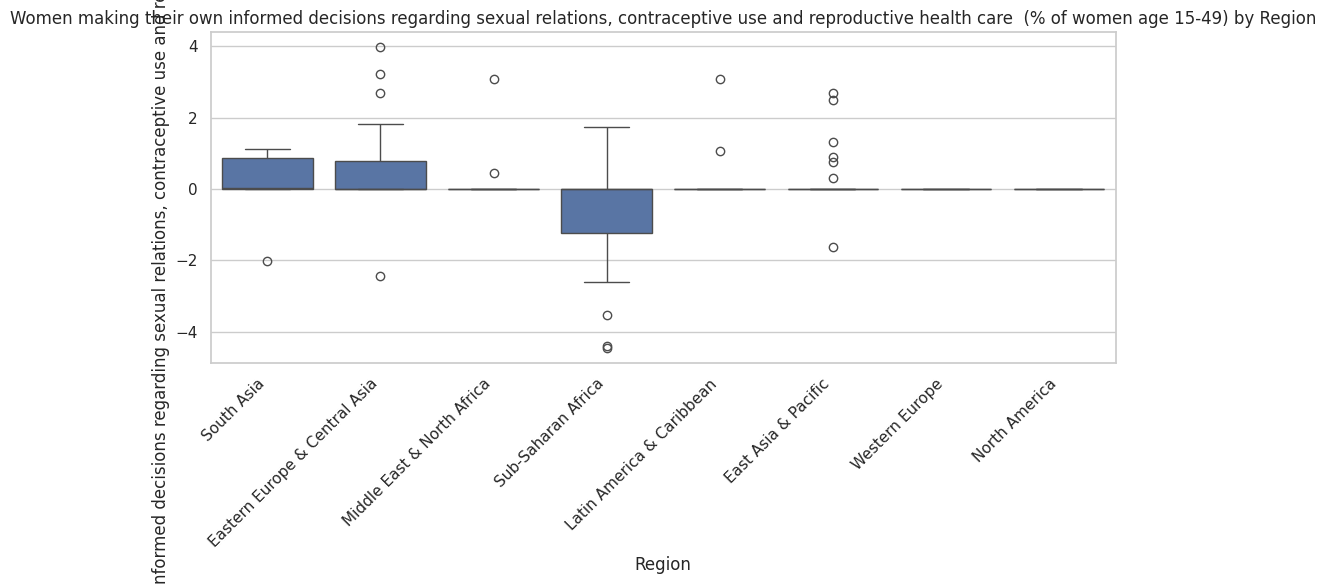

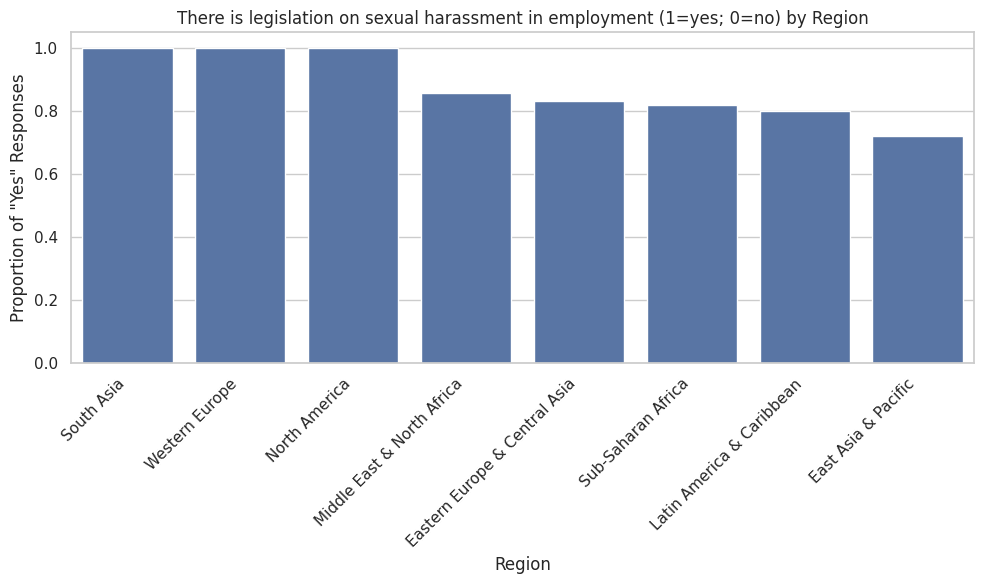

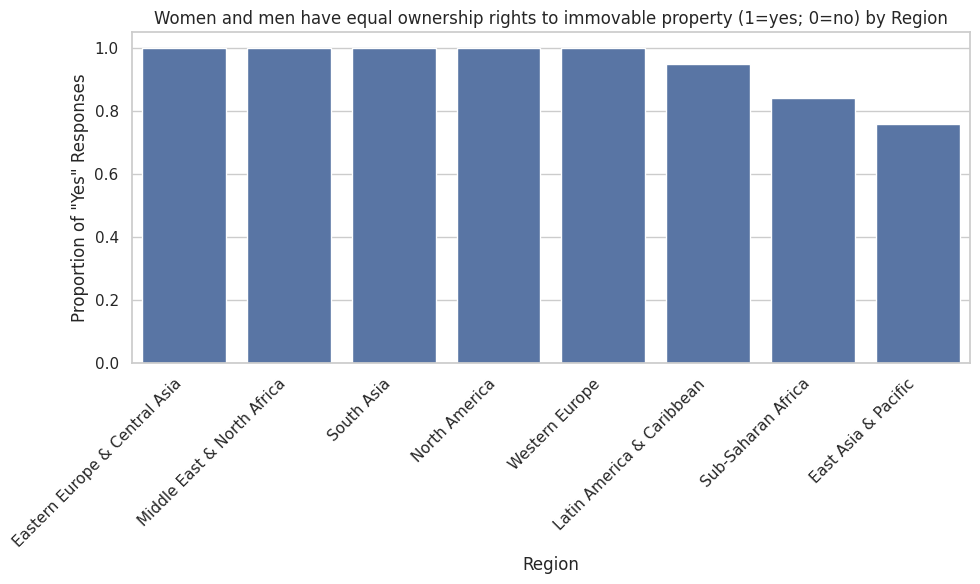

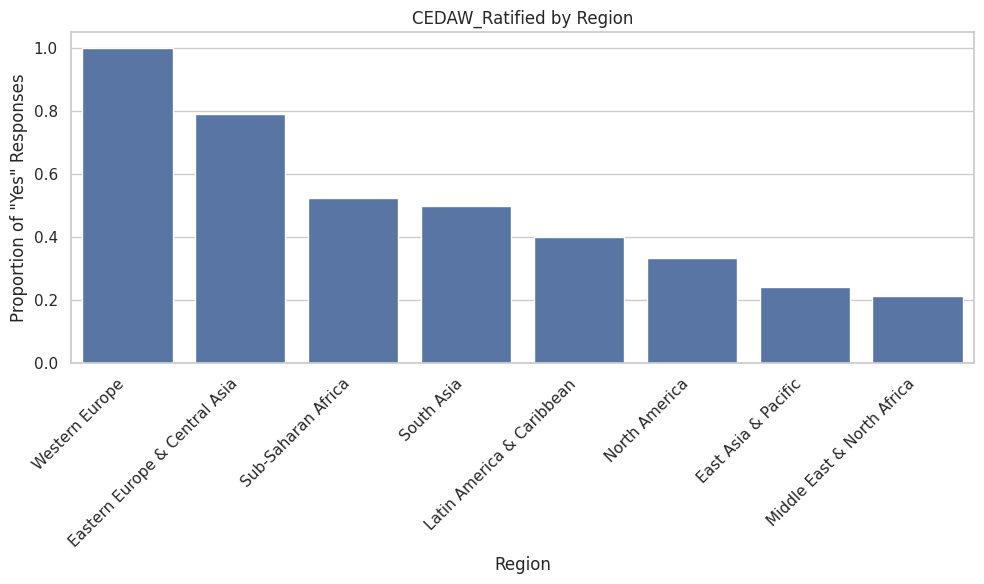

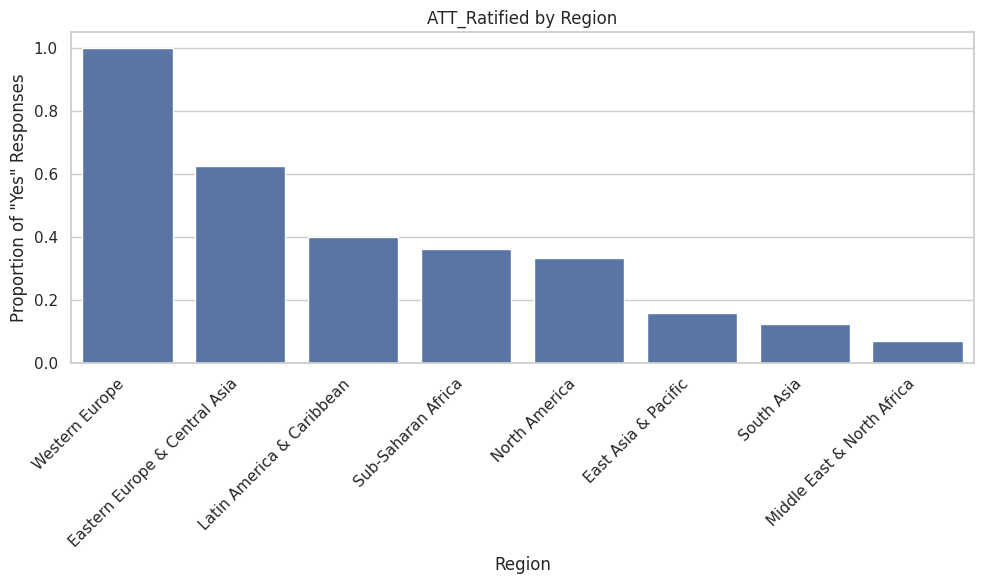

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ensure Region column exists
assert 'Region' in preprocessed_df.columns, "You must map regions first."

# List of numerical and binary/categorical fields to compare
numerical_fields = [
    'GII_Rank',
    'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)', # Corrected column name
    'Mean age at first marriage, female', # Corrected column name
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)' # Corrected column name
]

binary_fields = [
    'There is legislation on sexual harassment in employment (1=yes; 0=no)', # Corrected column name
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)', # Corrected column name
    'CEDAW_Ratified',
    'ATT_Ratified'
]

# --------- Plot numerical features (Boxplots) ----------
for field in numerical_fields:
    plt.figure()
    sns.boxplot(x='Region', y=field, data=preprocessed_df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{field} by Region')
    plt.tight_layout()
    plt.show()

# --------- Plot binary fields (Bar plots of % Yes) ----------
for field in binary_fields:
    # Group by Region and calculate mean (proportion of 1s)
    regional_means = preprocessed_df.groupby('Region')[field].mean().sort_values(ascending=False)

    plt.figure()
    sns.barplot(x=regional_means.index, y=regional_means.values)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Proportion of "Yes" Responses')
    plt.title(f'{field} by Region')
    plt.tight_layout()
    plt.show()

In [ ]:
# prompt: export dataset to csv

preprocessed_df.to_csv('preprocessed_data.csv', index=False)
from google.colab import files


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


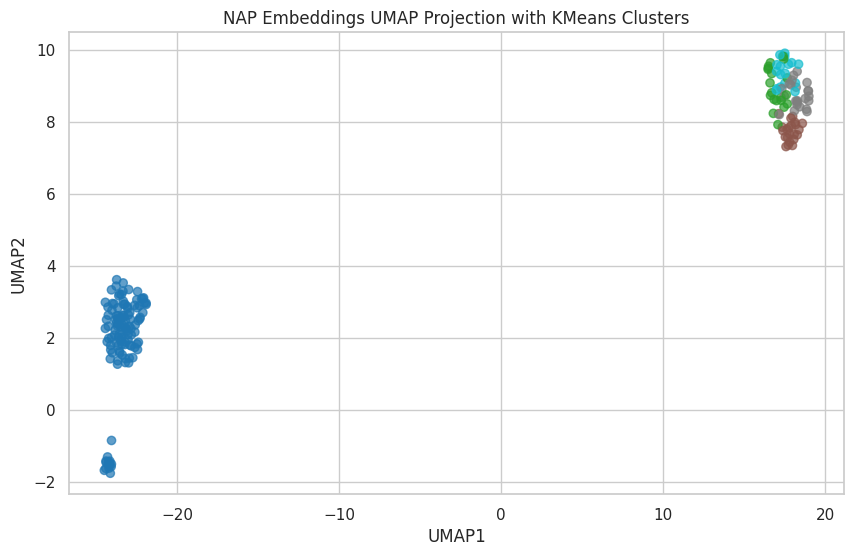

Cluster-wise Feature Means:
              GII_Rank  Military_Expenditure_Clean  \
Cluster                                             
0       -2.779573e-16                   -0.004204   
1       -2.321993e-01                   -0.339282   
2        6.706116e-01                   -0.510690   
3        3.474546e-02                    0.314279   
4       -6.060342e-01                    0.626435   

         Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)  \
Cluster                                                                                                                                  
0                                                 0.137431                                                                               
1                                                -0.584935                                                                               
2                                              

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
import matplotlib.pyplot as plt

# ... (your existing code)

# Load preprocessed data (ensure `Region` and `NAP_Text_Clean` exist)
df = pd.read_csv('preprocessed_data.csv')  # replace with your filepath

# Replace NaN with empty string before CountVectorizer
df['NAP_Text_Clean'] = df['NAP_Text_Clean'].fillna('')  # Impute NaN with empty string

# 1. Generate Embeddings for NAP Text
embed_model = SentenceTransformer('all-MiniLM-L6-v2')
# Convert all elements of 'NAP_Text_Clean' to strings
docs = df['NAP_Text_Clean'].astype(str).tolist()
embeddings = embed_model.encode(docs, show_progress_bar=True)
# Store embeddings in DataFrame
df['Embedding'] = list(embeddings)

# ... (rest of your code remains the same)

# ... (rest of your code remains the same)

# 2. Topic Modeling via LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df['NAP_Text_Clean'])

# Fit LDA model
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
topics_matrix = lda.fit_transform(dtm)
# Add topic distributions to df
for i in range(n_topics):
    df[f'Topic_{i}'] = topics_matrix[:, i]

# 3. Clustering on Embeddings
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(embeddings)

# 4. Dimensionality Reduction for Visualization
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)
df['UMAP1'] = umap_embeddings[:, 0]
df['UMAP2'] = umap_embeddings[:, 1]

# Plot UMAP with cluster coloring
plt.figure(figsize=(10, 6))
plt.scatter(df['UMAP1'], df['UMAP2'], c=df['Cluster'], cmap='tab10', alpha=0.7)
plt.title('NAP Embeddings UMAP Projection with KMeans Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

# 5. Analyze Distinctive Factors per Cluster
# a) Numerical & binary feature means by cluster
def load_features():
    return [  # same features used in preprocessing
        'GII_Rank', 'Military_Expenditure_Clean',
        'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
        'Mean age at first marriage, female',
        'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
        'There is legislation on sexual harassment in employment (1=yes; 0=no)',
        'Women and men have equal ownership rights to immovable property (1=yes; 0=no)',
        'CEDAW_Ratified', 'ATT_Ratified'
    ]

feature_cols = load_features()
cluster_feature_means = df.groupby('Cluster')[feature_cols].mean()
print("Cluster-wise Feature Means:\n", cluster_feature_means)

# b) Topic distribution by cluster
topic_cols = [f'Topic_{i}' for i in range(n_topics)]
cluster_topic_means = df.groupby('Cluster')[topic_cols].mean()
print("\nCluster-wise Topic Distribution:\n", cluster_topic_means)

# c) Identify top distinctive features per cluster
overall_feature_means = df[feature_cols].mean()
print("\nTop Distinctive Features per Cluster:")
for c in cluster_feature_means.index:
    diff = cluster_feature_means.loc[c] - overall_feature_means
    top_feats = diff.abs().sort_values(ascending=False).head(5)
    print(f"Cluster {c}: {list(top_feats.index)}")

# d) Identify top topics for each cluster
overall_topic_means = df[topic_cols].mean()
for c in cluster_topic_means.index:
    diff = cluster_topic_means.loc[c] - overall_topic_means
    top_topics = diff.sort_values(ascending=False).head(3)
    print(f"Cluster {c} Top Topics: {list(top_topics.index)}")

# e) Relate clusters to regions
table = pd.crosstab(df['Cluster'], df['Region'], normalize='index')
print("\nCluster composition by Region (%):\n", table)

# Save enriched DataFrame
df.to_csv('nap_nlp_enriched.csv', index=False)
print('Saved enriched data to nap_nlp_enriched.csv')


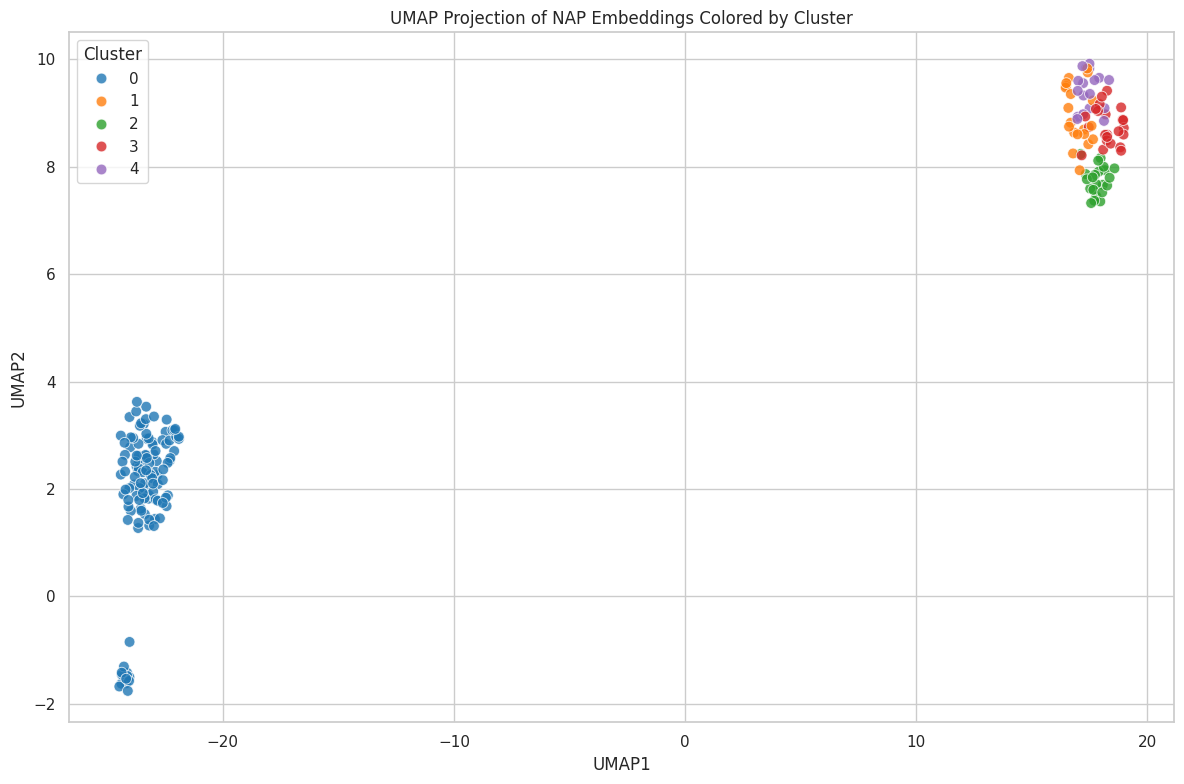

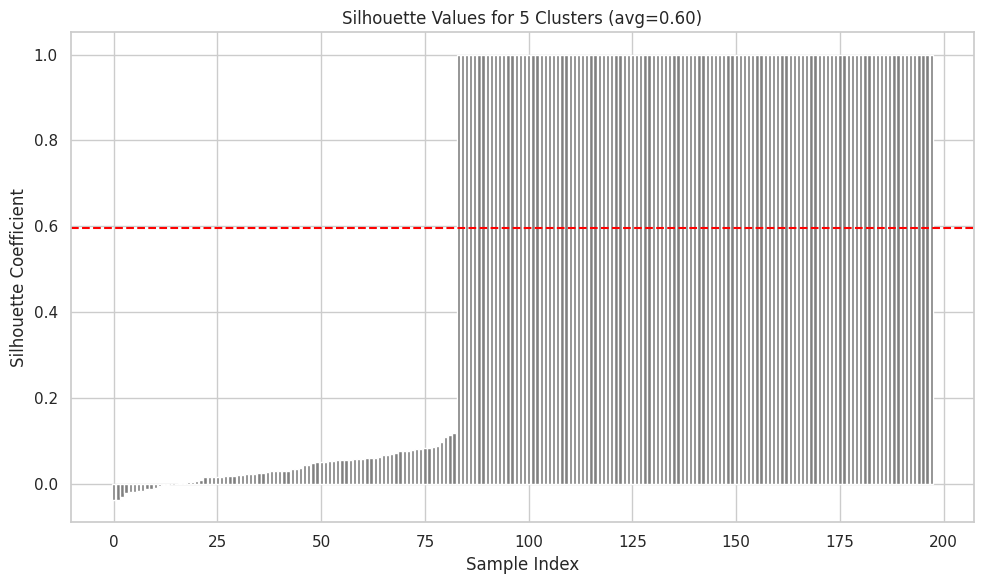

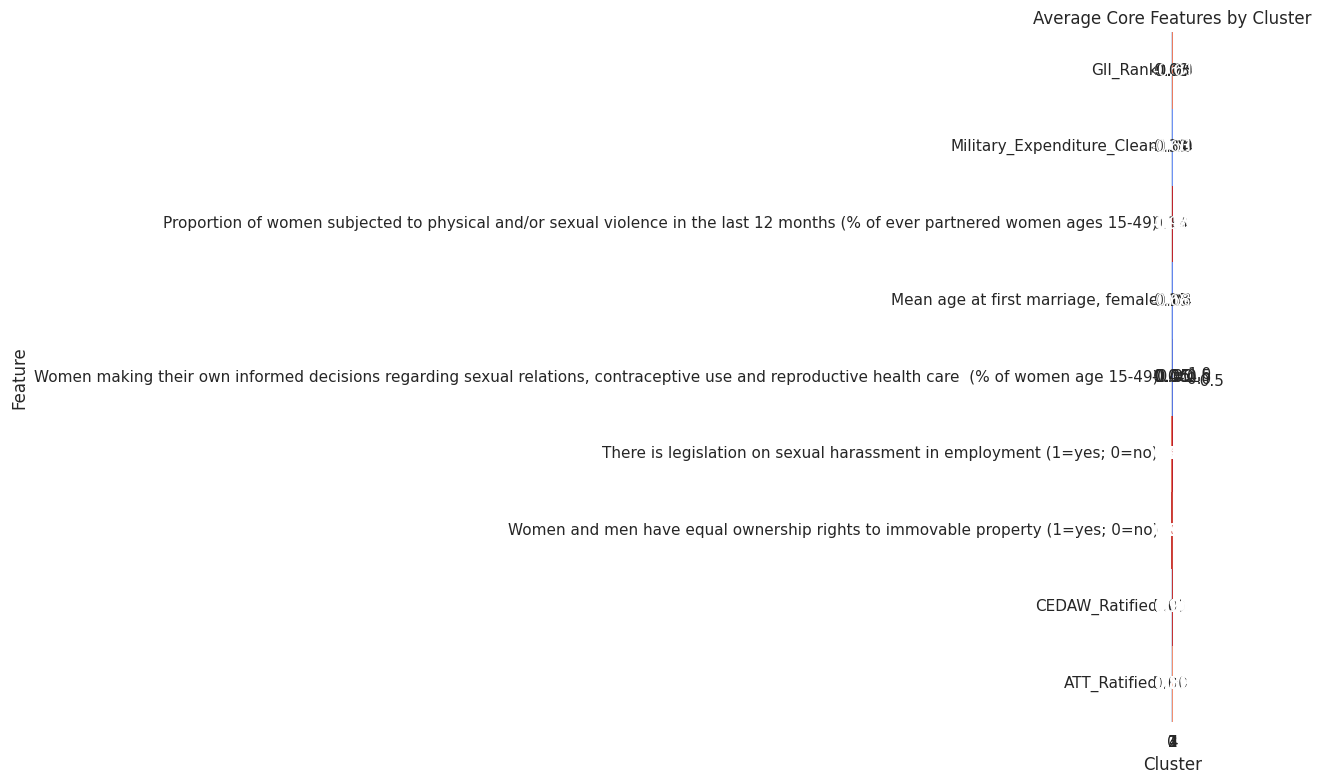

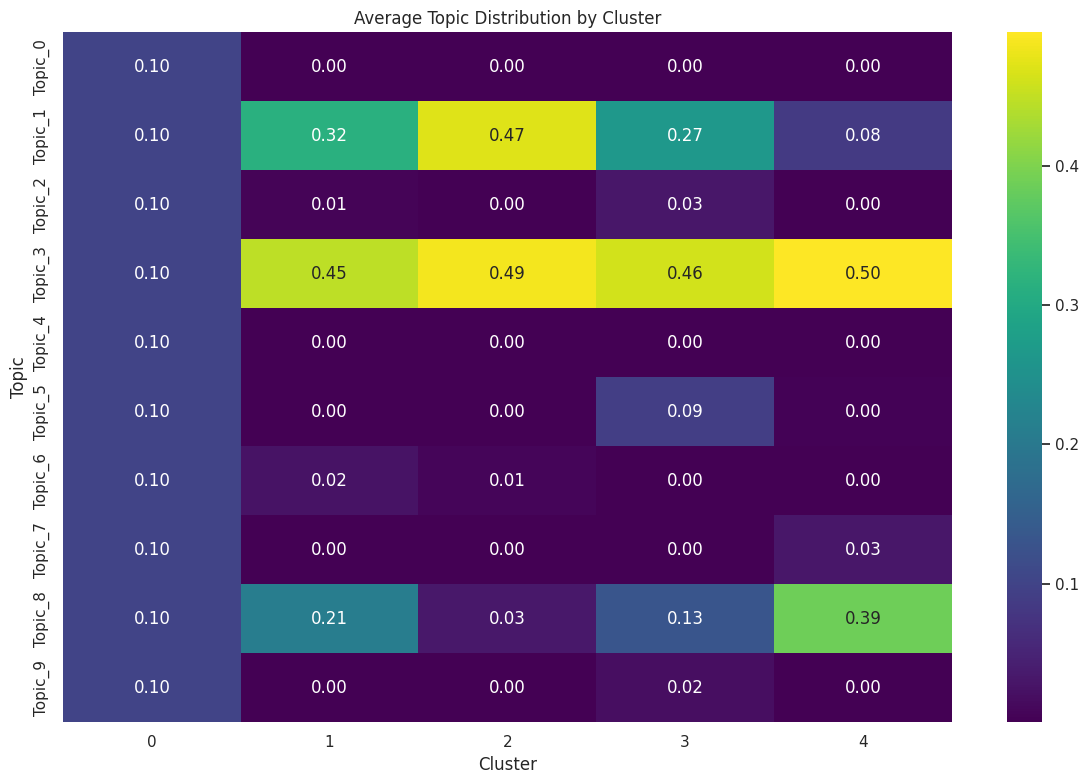

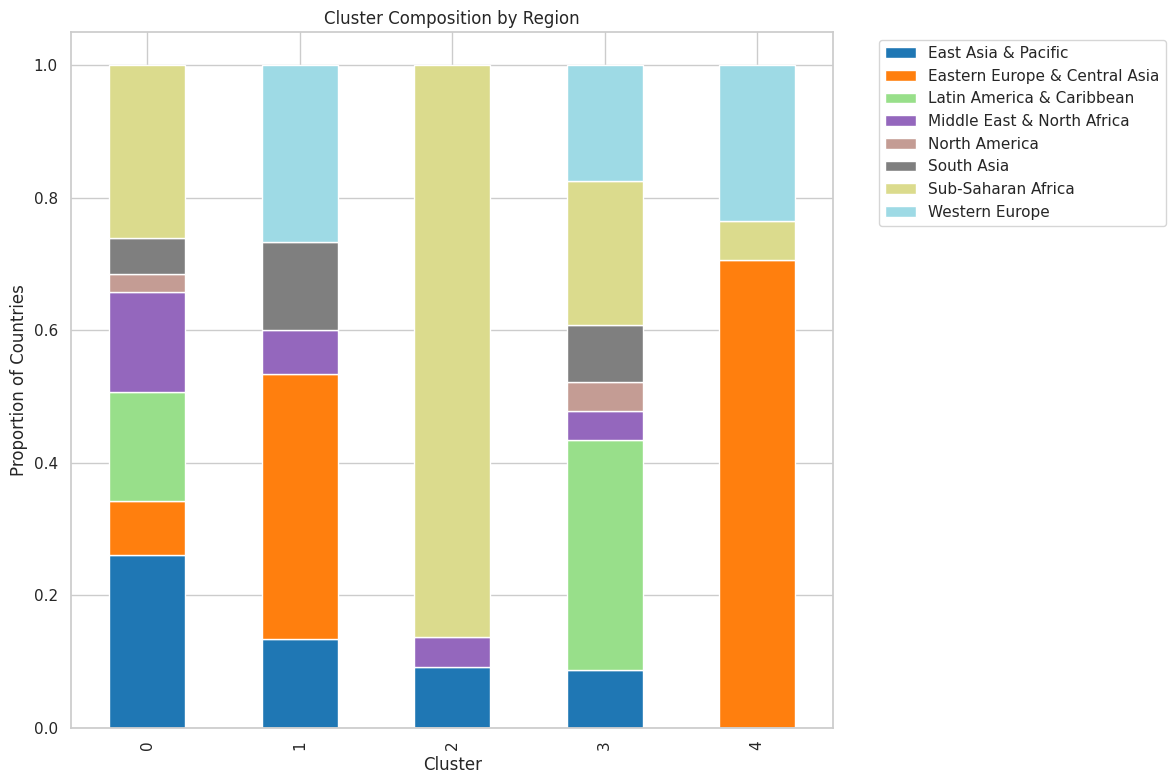

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score

# Load enriched data
# Ensure this CSV includes embeddings, topics, clusters, UMAP coords, etc.
df = pd.read_csv('nap_nlp_enriched.csv')

# Set seaborn style
sns.set(style="whitegrid")

# 1. UMAP Scatter Plot by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='Cluster', palette='tab10',
    data=df, s=60, alpha=0.8
)
plt.title('UMAP Projection of NAP Embeddings Colored by Cluster')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 2. Silhouette Analysis
cluster_labels = df['Cluster']
embs = np.stack(df['Embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')))
n_clusters = df['Cluster'].nunique()
silhouette_vals = silhouette_samples(embs, cluster_labels)
silhouette_avg = silhouette_score(embs, cluster_labels)

plt.figure(figsize=(10, 6))
plt.bar(range(len(silhouette_vals)), np.sort(silhouette_vals), color='gray')
plt.axhline(silhouette_avg, color='red', linestyle='--')
plt.title(f'Silhouette Values for {n_clusters} Clusters (avg={silhouette_avg:.2f})')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

# 3. Feature Heatmap (Cluster vs Core Features)
feature_cols = [
    'GII_Rank', 'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
    'Mean age at first marriage, female',
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)',
    'CEDAW_Ratified', 'ATT_Ratified'
]
cluster_feature_means = df.groupby('Cluster')[feature_cols].mean().T

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_feature_means, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Average Core Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 4. Topic Distribution Heatmap (Cluster vs Topics)
topic_cols = [c for c in df.columns if c.startswith('Topic_')]
cluster_topic_means = df.groupby('Cluster')[topic_cols].mean().T

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_topic_means, annot=True, fmt='.2f', cmap='viridis')
plt.title('Average Topic Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Topic')
plt.tight_layout()
plt.show()

# 5. Region Composition Stacked Bar Chart
table = pd.crosstab(df['Cluster'], df['Region'], normalize='index')
table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Cluster Composition by Region')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. Save Figures (optional)
# for i, fig in enumerate(plt.get_fignums()):
#     plt.figure(fig)
#     plt.savefig(f'figure_{i}.png', dpi=300)


Extracted Topics and Top Words:
Topic_0: stability, wilpf, terrorism, distinct, france, inequalities, allocations, french, executive, resulting
Topic_1: women, nap, ss, national, participation, implementation, security, peace, plan, gender
Topic_2: nap, goal, women, peace, gender, ss, revised, goals, update, 2018
Topic_3: women, nap, conflict, gender, ss, peace, security, violence, implementation, prevention
Topic_4: stability, wilpf, terrorism, distinct, france, inequalities, allocations, french, executive, resulting
Topic_5: new, security, women, peace, nap, missions, gender, ss, conflict, rights
Topic_6: iraq, nap, social, armed, political, resources, ministry, economic, instability, 2024
Topic_7: gender, affairs, plan, sector, internal, defence, ministry, based, national, violence
Topic_8: nap, implementation, security, women, gender, peace, international, ss, agenda, national
Topic_9: security, sector, gender, women, 2021, conduct, national, 2018, responsive, awareness


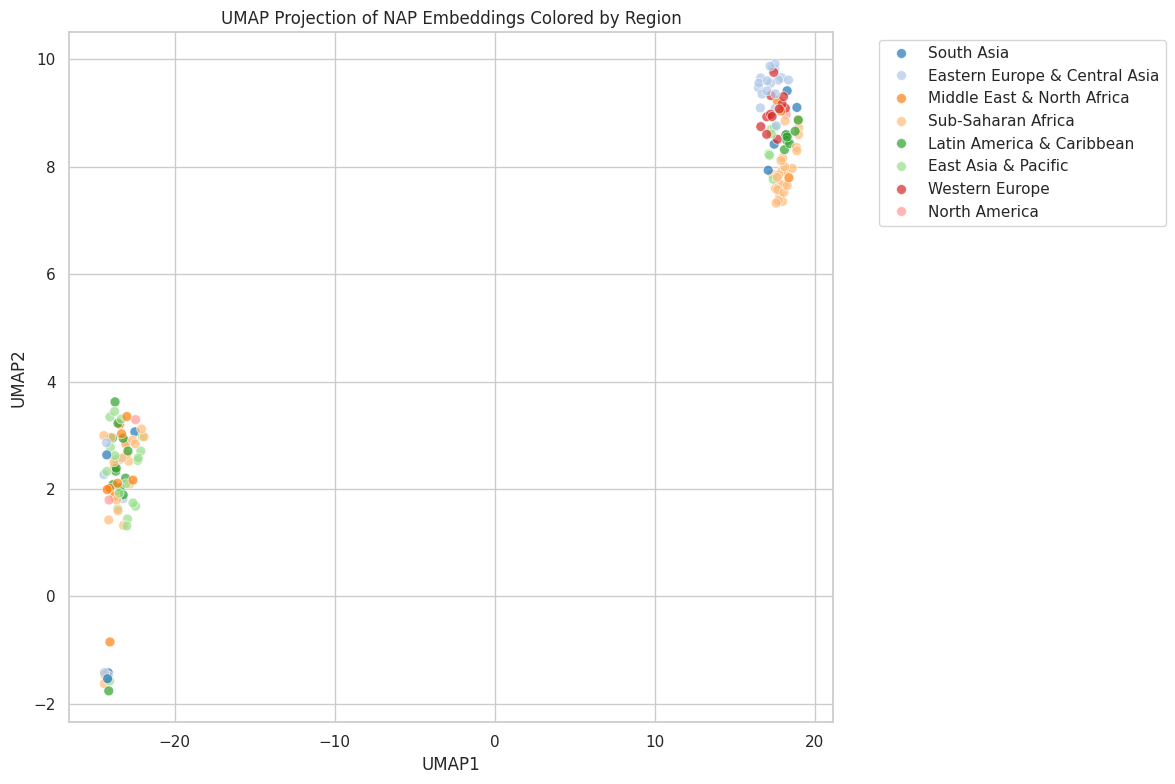

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score

# ------------- Load Data -------------
df = pd.read_csv('nap_nlp_enriched.csv')  # must include Embedding, Topic_*, Cluster, UMAP1, UMAP2, Country, Region

# Fill NaN values in 'NAP_Text_Clean' with empty strings
df['NAP_Text_Clean'] = df['NAP_Text_Clean'].fillna('')

# ------------- 1. Display Extracted Topics -------------
# Rebuild CountVectorizer and LDA to access feature names and components
top_n = 10  # top words per topic
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df['NAP_Text_Clean'])
lda = LatentDirichletAllocation(n_components=len([c for c in df if c.startswith('Topic_')]), random_state=42)
lda.fit(dtm)
feature_names = vectorizer.get_feature_names_out()

topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-top_n - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics[f'Topic_{topic_idx}'] = top_features

print("Extracted Topics and Top Words:")
for t, words in topics.items():
    print(f"{t}: {', '.join(words)}")

# ------------- 2. World Map of Clusters with Plotly -------------
# Prepare mapping for Plotly choropleth
merge_df = df[['Country', 'Cluster']].copy()
# Adjust country names to Plotly-recognized names if needed
name_map = {
    'United States': 'United States',
    'Russia': 'Russian Federation',
    "Côte d'Ivoire": "Cote d'Ivoire"
}
merge_df['Country_plot'] = merge_df['Country'].replace(name_map)

fig = px.choropleth(
    merge_df,
    locations='Country_plot',
    locationmode='country names',
    color='Cluster',
    color_continuous_scale=px.colors.qualitative.Plotly,
    title='Global Distribution of NAP Clusters',
    labels={'Cluster': 'Cluster'}
)
fig.update_layout(
    legend_title_text='Cluster',
    geo=dict(showframe=False, showcoastlines=False)
)
fig.show()

# ------------- 3. Optional: UMAP Scatter with Region Labels -------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='Region',
    data=df, palette='tab20', s=50, alpha=0.7
)
plt.title('UMAP Projection of NAP Embeddings Colored by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Cluster sizes:
 Cluster
0    115
1     20
2     22
3     23
4     18
Name: count, dtype: int64


<ipython-input-12-ee88beb0bce8>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




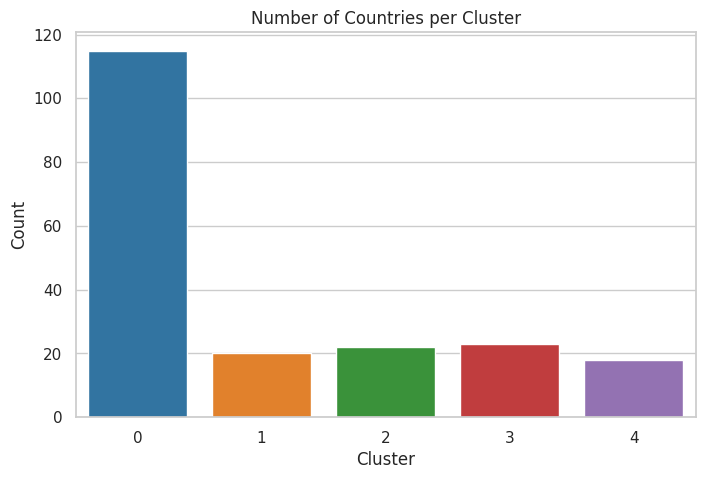

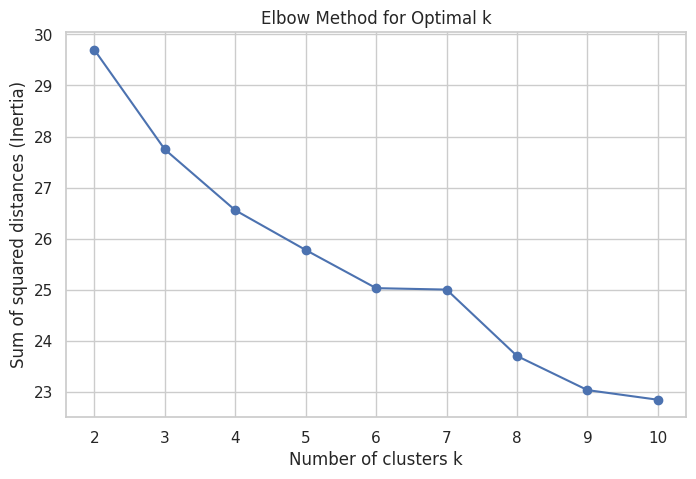

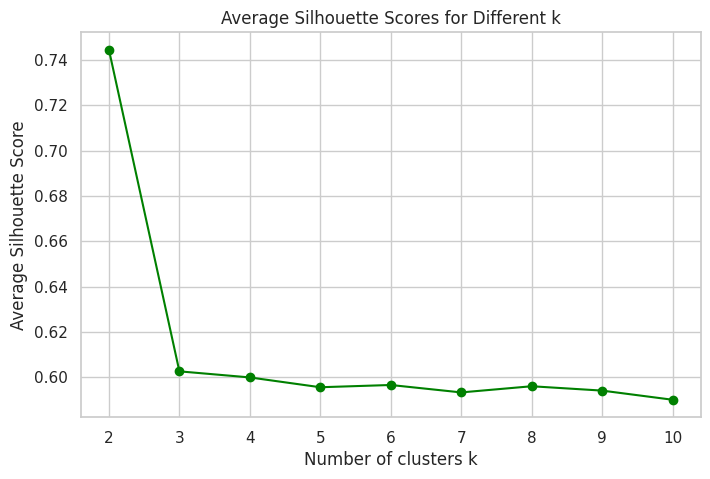

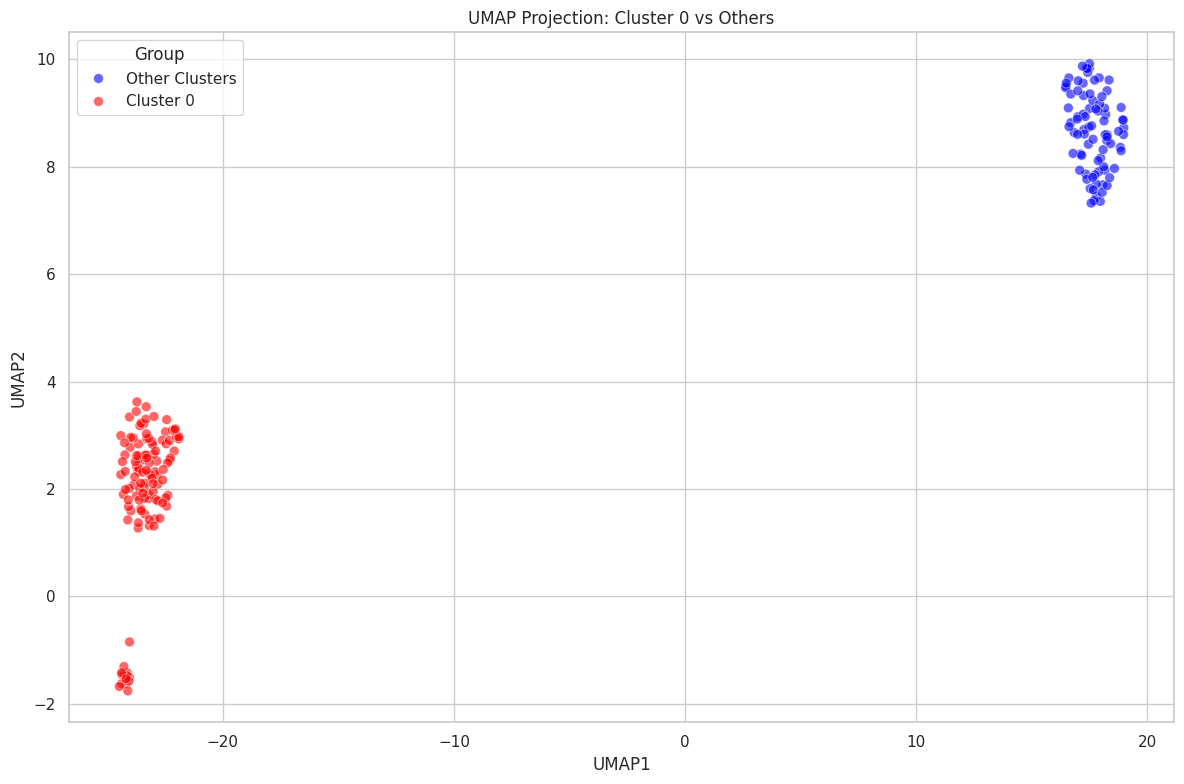

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score

# ------------- Load Data -------------
df = pd.read_csv('nap_nlp_enriched.csv')  # must include Embedding, Topic_*, Cluster, UMAP1, UMAP2, Country, Region

# ------------- 0. Examine Cluster Sizes -------------
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Cluster sizes:\n", cluster_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.title('Number of Countries per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# ------------- 1. Elbow Method to Evaluate K -------------
sse = []
K_range = range(2, 11)
embs = np.vstack(df['Embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')))
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(embs)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (Inertia)')
plt.xticks(K_range)
plt.show()

# ------------- 2. Silhouette Scores for Different k -------------
sil_avgs = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(embs)
    sil_avgs.append(silhouette_score(embs, labels))

plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_avgs, marker='o', color='green')
plt.title('Average Silhouette Scores for Different k')
plt.xlabel('Number of clusters k')
plt.ylabel('Average Silhouette Score')
plt.xticks(K_range)
plt.show()

# ------------- 3. Visualize Cluster 0 vs Others on UMAP -------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue=df['Cluster'].apply(lambda x: 'Cluster 0' if x==0 else 'Other Clusters'),
    data=df, palette={'Cluster 0':'red','Other Clusters':'blue'}, s=50, alpha=0.6
)
plt.title('UMAP Projection: Cluster 0 vs Others')
plt.legend(title='Group')
plt.tight_layout()
plt.show()


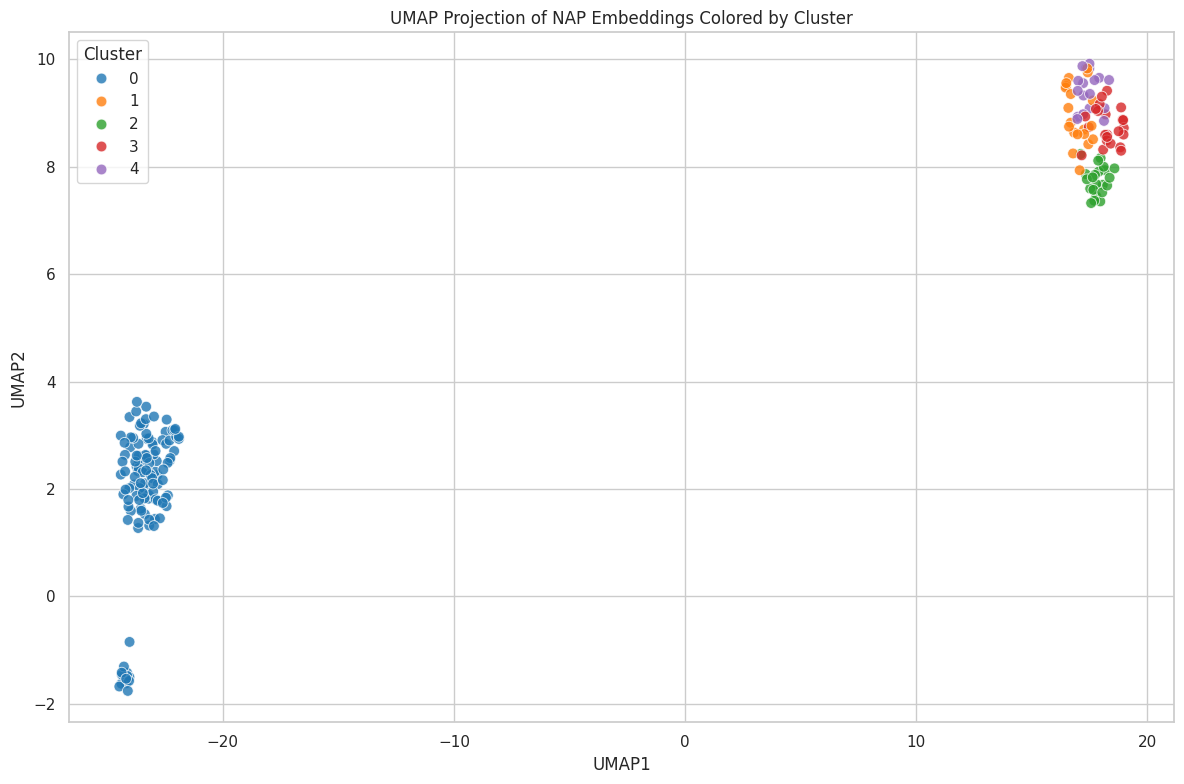

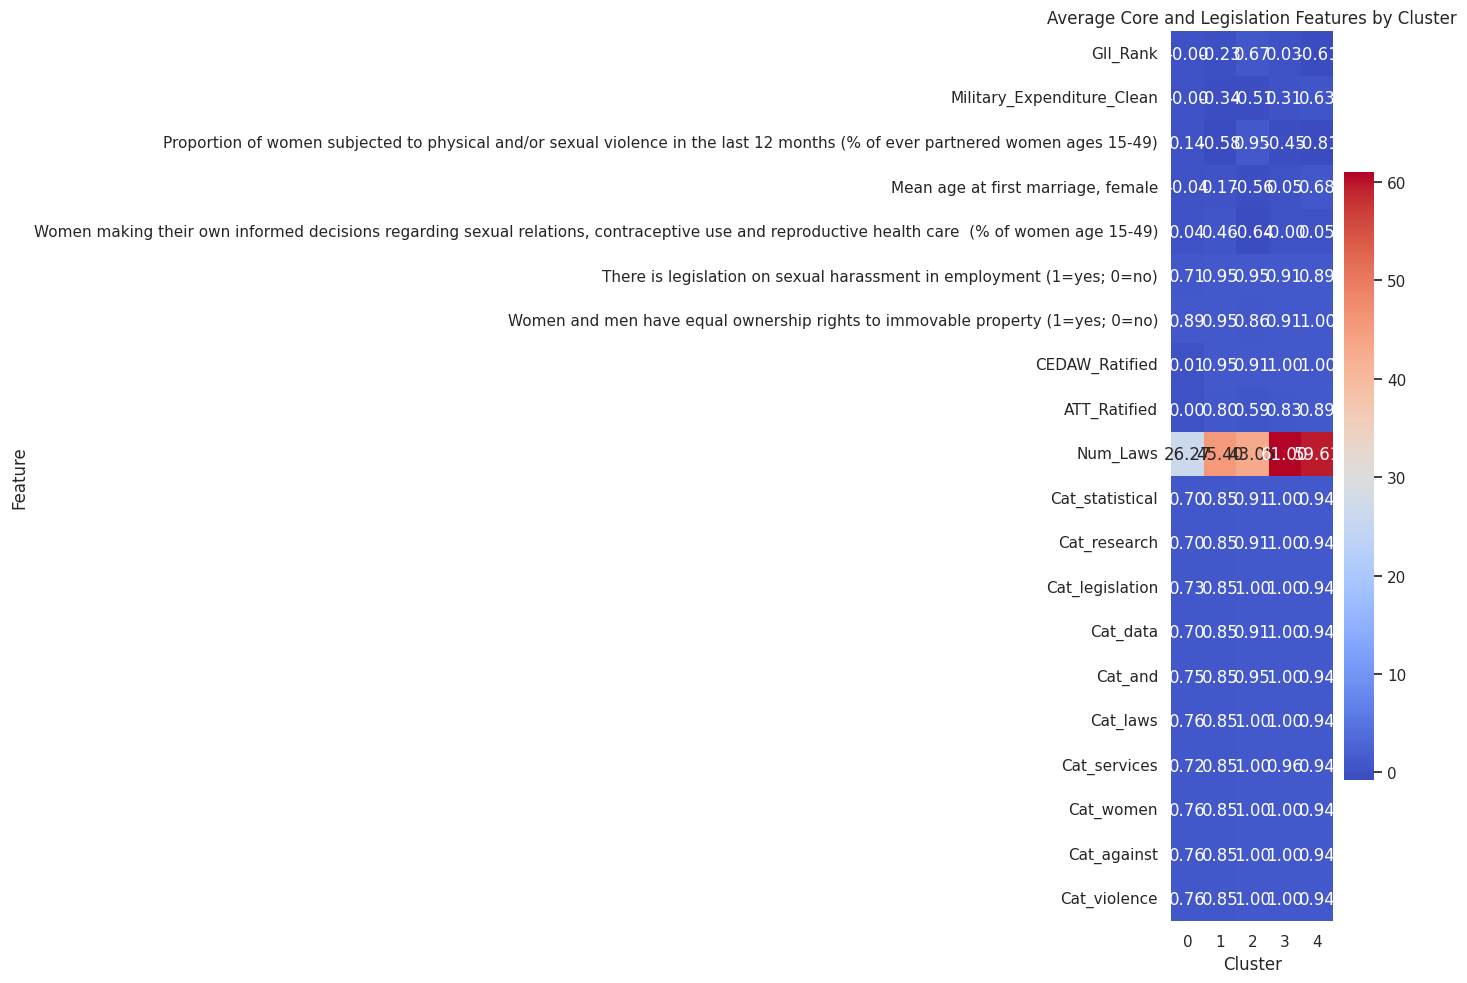

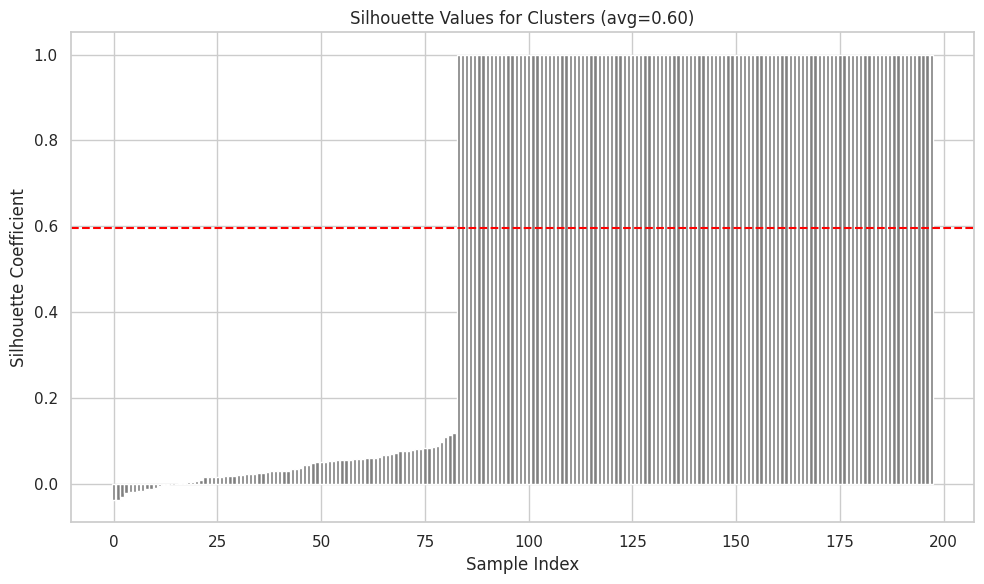

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score
import re

# ------------- Load Data -------------
df = pd.read_csv('nap_nlp_enriched.csv')  # must include Embedding, Topic_*, Cluster, UMAP1, UMAP2, Country, Region, Legislation_List

# ------------- Parse Legislation Column -------------
# Expect format: "Law Name 1: Description 1\nLaw Name 2: Description 2"
def parse_legislation(text):
    laws = []
    if pd.isna(text):
        return laws
    for entry in re.split(r"\n|;", text):
        parts = entry.split(":", 1)
        if len(parts) == 2:
            name = parts[0].strip()
            desc = parts[1].strip()
            laws.append({'name': name, 'description': desc})
    return laws

# Apply parser
df['Legislation_Parsed'] = df['legislation'].apply(parse_legislation)
# Number of laws per country
df['Num_Laws'] = df['Legislation_Parsed'].apply(len)

# Extract categories from descriptions using '>' delimiter, if present
def extract_categories(laws):
    cats = []
    for law in laws:
        parts = law['description'].split('>')
        # take all parts as categories
        for cat in parts:
            cat_clean = cat.strip()
            if cat_clean:
                cats.append(cat_clean)
    return cats

# Build category features
df['Legislation_Categories'] = df['Legislation_Parsed'].apply(extract_categories)
# Flatten category list for vectorization
df['Cat_Text'] = df['Legislation_Categories'].apply(lambda cats: ' '.join(cats))

# Vectorize categories with CountVectorizer
cat_vectorizer = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b\w+\b")
cat_dtm = cat_vectorizer.fit_transform(df['Cat_Text'])
cat_feature_names = cat_vectorizer.get_feature_names_out()
# Limit to top 10 frequent categories
cat_counts = np.asarray(cat_dtm.sum(axis=0)).ravel()
top_idx = np.argsort(cat_counts)[-10:]
top_cats = [cat_feature_names[i] for i in top_idx]
# Create binary indicators for top categories
for cat in top_cats:
    df[f'Cat_{cat}'] = (df['Cat_Text'].str.contains(rf"\b{re.escape(cat)}\b", case=False)).astype(int)

# ------------- Integrate New Features into Analysis -------------
# Update feature columns for heatmap and cluster analysis
feature_cols = [
    'GII_Rank', 'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
    'Mean age at first marriage, female',
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)',
    'CEDAW_Ratified', 'ATT_Ratified', 'Num_Laws'
] + [f'Cat_{cat}' for cat in top_cats]

# ------------- Visualizations -------------
# 1. UMAP Scatter by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=df, palette='tab10', s=60, alpha=0.8)
plt.title('UMAP Projection of NAP Embeddings Colored by Cluster')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 2. World Map with Plotly
merge_df = df[['Country', 'Cluster']].copy()
name_map = {'United States': 'United States', 'Russia': 'Russian Federation', "Côte d'Ivoire": "Cote d'Ivoire"}
merge_df['Country_plot'] = merge_df['Country'].replace(name_map)
fig = px.choropleth(merge_df, locations='Country_plot', locationmode='country names', color='Cluster',
                    color_continuous_scale=px.colors.qualitative.Plotly,
                    title='Global Distribution of NAP Clusters')
fig.update_layout(legend_title_text='Cluster', geo=dict(showframe=False, showcoastlines=False))
fig.show()

# 3. Feature Heatmap
cluster_feature_means = df.groupby('Cluster')[feature_cols].mean().T
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_feature_means, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Average Core and Legislation Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 4. Silhouette Analysis
embs = np.vstack(df['Embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')))
cluster_labels = df['Cluster']
silhouette_vals = silhouette_samples(embs, cluster_labels)
silhouette_avg = silhouette_score(embs, cluster_labels)
plt.figure(figsize=(10, 6))
plt.bar(range(len(silhouette_vals)), np.sort(silhouette_vals), color='gray')
plt.axhline(silhouette_avg, color='red', linestyle='--')
plt.title(f'Silhouette Values for Clusters (avg={silhouette_avg:.2f})')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("nap_nlp_enriched.csv")

## RAG

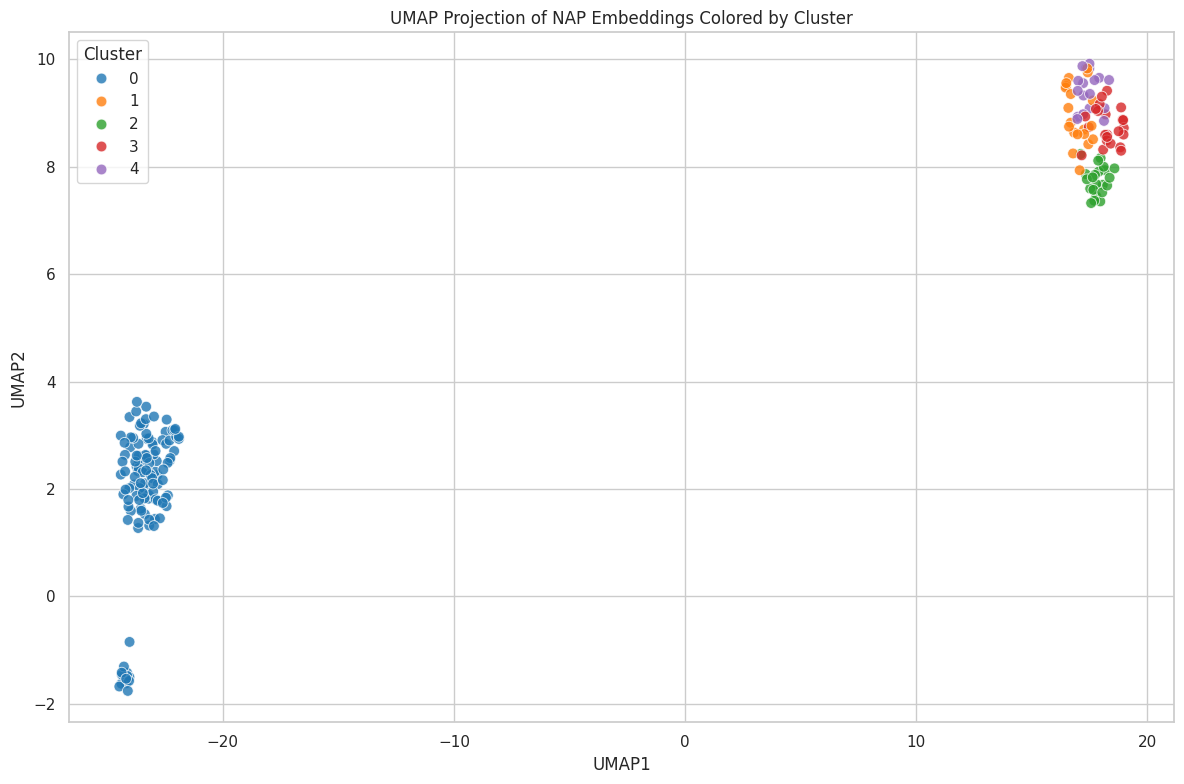

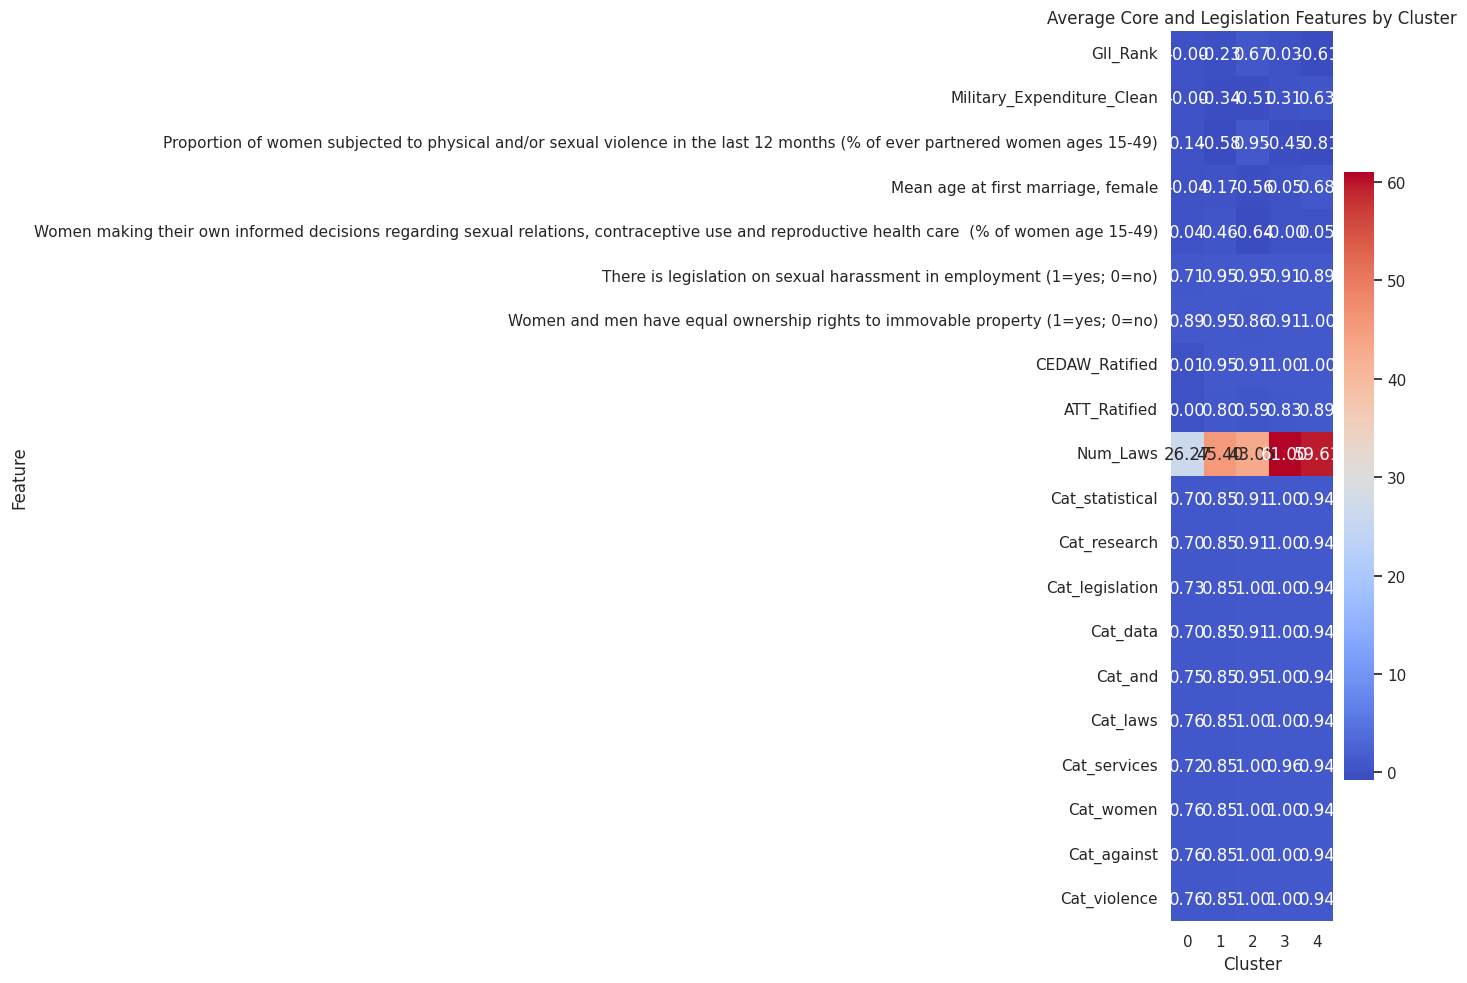

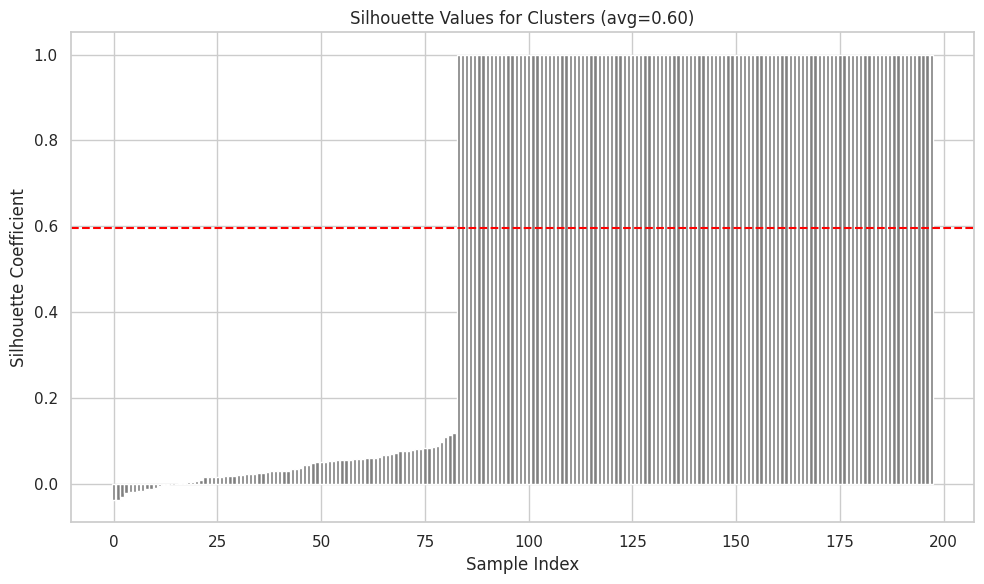


▶ Generating NAP for: Algeria


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score
import re
import openai

# Load Data
df = pd.read_csv('nap_nlp_enriched.csv')

# Parse Legislation Column
def parse_legislation(text):
    laws = []
    if pd.isna(text):
        return laws
    for entry in re.split(r"\n|;", text):
        parts = entry.split(":", 1)
        if len(parts) == 2:
            name = parts[0].strip()
            desc = parts[1].strip()
            laws.append({'name': name, 'description': desc})
    return laws

df['Legislation_Parsed'] = df['legislation'].apply(parse_legislation)
df['Num_Laws'] = df['Legislation_Parsed'].apply(len)

def extract_categories(laws):
    cats = []
    for law in laws:
        parts = law['description'].split('>')
        for cat in parts:
            cat_clean = cat.strip()
            if cat_clean:
                cats.append(cat_clean)
    return cats

df['Legislation_Categories'] = df['Legislation_Parsed'].apply(extract_categories)
df['Cat_Text'] = df['Legislation_Categories'].apply(lambda cats: ' '.join(cats))

cat_vectorizer = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b\w+\b")
cat_dtm = cat_vectorizer.fit_transform(df['Cat_Text'])
cat_feature_names = cat_vectorizer.get_feature_names_out()
cat_counts = np.asarray(cat_dtm.sum(axis=0)).ravel()
top_idx = np.argsort(cat_counts)[-10:]
top_cats = [cat_feature_names[i] for i in top_idx]
for cat in top_cats:
    df[f'Cat_{cat}'] = (df['Cat_Text'].str.contains(rf"\b{re.escape(cat)}\b", case=False)).astype(int)

feature_cols = [
    'GII_Rank', 'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
    'Mean age at first marriage, female',
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)',
    'CEDAW_Ratified', 'ATT_Ratified', 'Num_Laws'
] + [f'Cat_{cat}' for cat in top_cats]

def compare_country_to_peers(df, country):
    base = df[df['Country'] == country].iloc[0]
    cluster_peers = df[(df['Cluster'] == base['Cluster']) & (df['Country'] != country)]
    region_peers = df[(df['Region'] == base['Region']) & (df['Country'] != country)]
    metrics = {}
    for col in feature_cols:
        val = base[col]
        cluster_avg = cluster_peers[col].mean()
        region_avg = region_peers[col].mean()
        metrics[col] = {
            'value': val,
            'cluster_avg': cluster_avg,
            'region_avg': region_avg
        }
    return metrics

def build_formatted_prompt(country, row, similar_df, comparison_metrics):
    laws = row['Legislation_Parsed']
    law_text = "\n".join([f"- {law['name']}: {law['description']}" for law in laws])

    similar_context = ""
    for _, r in similar_df.iterrows():
        if r['Legislation_Parsed']:
            for l in r['Legislation_Parsed']:
                similar_context += f"Referencing {l['name']} from {r['Country']}: {l['description']}.\n"

    comparison_text = ""
    for metric, vals in comparison_metrics.items():
        comparison_text += f"{metric}: {vals['value']} (Cluster avg: {vals['cluster_avg']:.2f}, Region avg: {vals['region_avg']:.2f})\n"

    full_prompt = f"""
**You are a policy assistant that drafts or refines a country’s National Action Plan (NAP) for gender equality. You will be given a table row containing:**
– Country, Year
– Proportion of women subjected to physical and/or sexual violence in the last 12 months (% ever‑partnered, 15–49)
– Sexual‑harassment‑in‑employment legislation (1=yes; 0=no)
– Equal immovable‑property‑ownership rights (1=yes; 0=no)
– Percent of women (15–49) making informed decisions on sexual relations, contraception & reproductive health
– Mean age at first marriage (female)
– NAP_Summary (if present; otherwise blank)
– CEDAW ratification status
– Gender Inequality Index rank
– Arms Trade Treaty signature status
– Military Expenditure (% GDP)
– Actors, Timeframe, Objectives, Actions/Activities, Indicators, M&E, Budget, Disarmament, legislation_list

**Country: {country}**
**Legislation:**
{law_text}

**Peer Legislation Examples:**
{similar_context}

**Data Comparison to Regional and Cluster Peers:**
{comparison_text}

---

1. **Contextual Analysis**
   - Compare each statistic against at least two neighboring or socio‑politically similar countries (e.g., proximity, economy, democratic structure, defence profile).
   - Draw out 2–3 key insights (e.g. “Mean marriage age is 4 years lower than in [Peer], likely limiting women’s workforce entry”).
2. **Legislative Gap Assessment**
   - Identify any “0” flags in the legislation columns.
   - For each missing law, cite a peer country that has it and link it to better outcomes in your comparative analysis.
3. **NAP Mode**
   - If NAP_Summary is blank, **Draft a complete NAP** with:
     - Clear Objectives (3–5)
     - Time‑bound Actions & Actors
     - Indicators & M&E plan
     - Tentative Budget & Funding sources
     - Disarmament/defence‑related gender measures
     - Required new legislation (with model text references)
   - If an NAP exists, **Critique & Strengthen** it by:
     - Highlighting 2–3 missing issues (based on your gap analysis)
     - Proposing concrete amendments or new measures
     - Re‑aligning indicators for clarity and feasibility
4. **Peer‑Practice Recommendations**
   - For each major recommendation, reference a “best practice” peer.
   - Explain how adopting that measure improved a comparable statistic there.
5. **Final Output**
   - Write as a polished policy memo, with sections:
     1. Executive Summary
     2. Context & Comparative Analysis
     3. Legislative Gaps & Peer Practices
     4. NAP (New or Revised)
     5. Implementation Roadmap (Actors, Timeline, Budget, M&E)
    """

    return full_prompt.strip()




def generate_nap_gpt(prompt, max_tokens=1024):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo-0125",
        messages=[
            {"role": "system", "content": "You are a helpful policy drafting assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=max_tokens,
        temperature=0.7
    )
    # Access the content using .content instead of ['content']
    return response.choices[0].message.content

# Final generation test for countries with laws but no NAP
results = []
targets = df[df['NAP_Text_Clean'].isna() & (df['Num_Laws'] > 0)]

for idx, row in targets[:1].iterrows():
    country = row['Country']
    print(f"\n▶ Generating NAP for: {country}")
    similar = df[(df['Cluster'] == row['Cluster']) & (df['Country'] != country)].head(3)
    comparison = compare_country_to_peers(df, country)
    prompt = build_formatted_prompt(country, row, similar, comparison)
    nap_output = generate_nap_gpt(prompt)
    results.append({'Country': country, 'Prompt': prompt, 'Generated_NAP': nap_output})

# Export
pd.DataFrame(results).to_csv("generated_naps_full.csv", index=False)


In [ ]:
country = "Bermuda"
print(f"\n▶ Generating NAP for: {country}")
similar = df[(df['Cluster'] == row['Cluster']) & (df['Country'] != country)].head(3)
comparison = compare_country_to_peers(df, country)
prompt = build_formatted_prompt(country, row, similar, comparison)
nap_output = generate_nap_gpt(prompt)
results.append({'Country': country, 'Prompt': prompt, 'Generated_NAP': nap_output})

# Export
pd.DataFrame(results).to_csv(f"generated_nap_{country}.csv", index=False)


▶ Generating NAP for: Bermuda


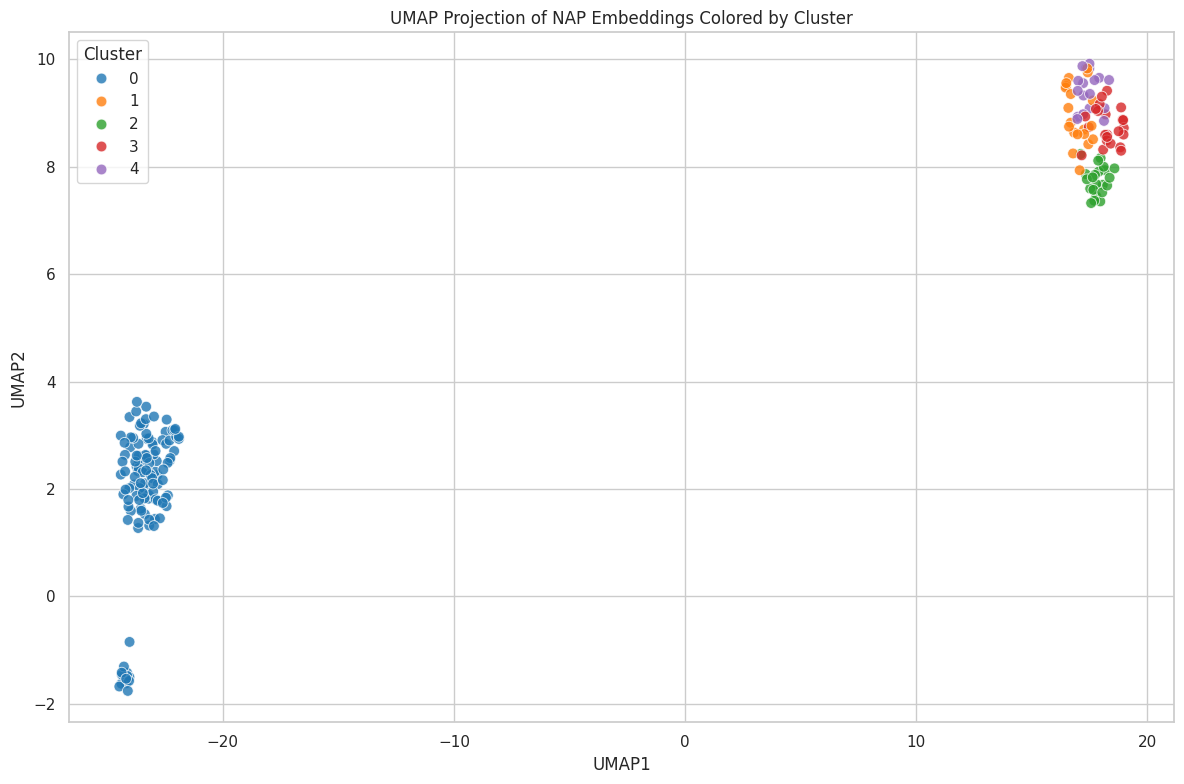

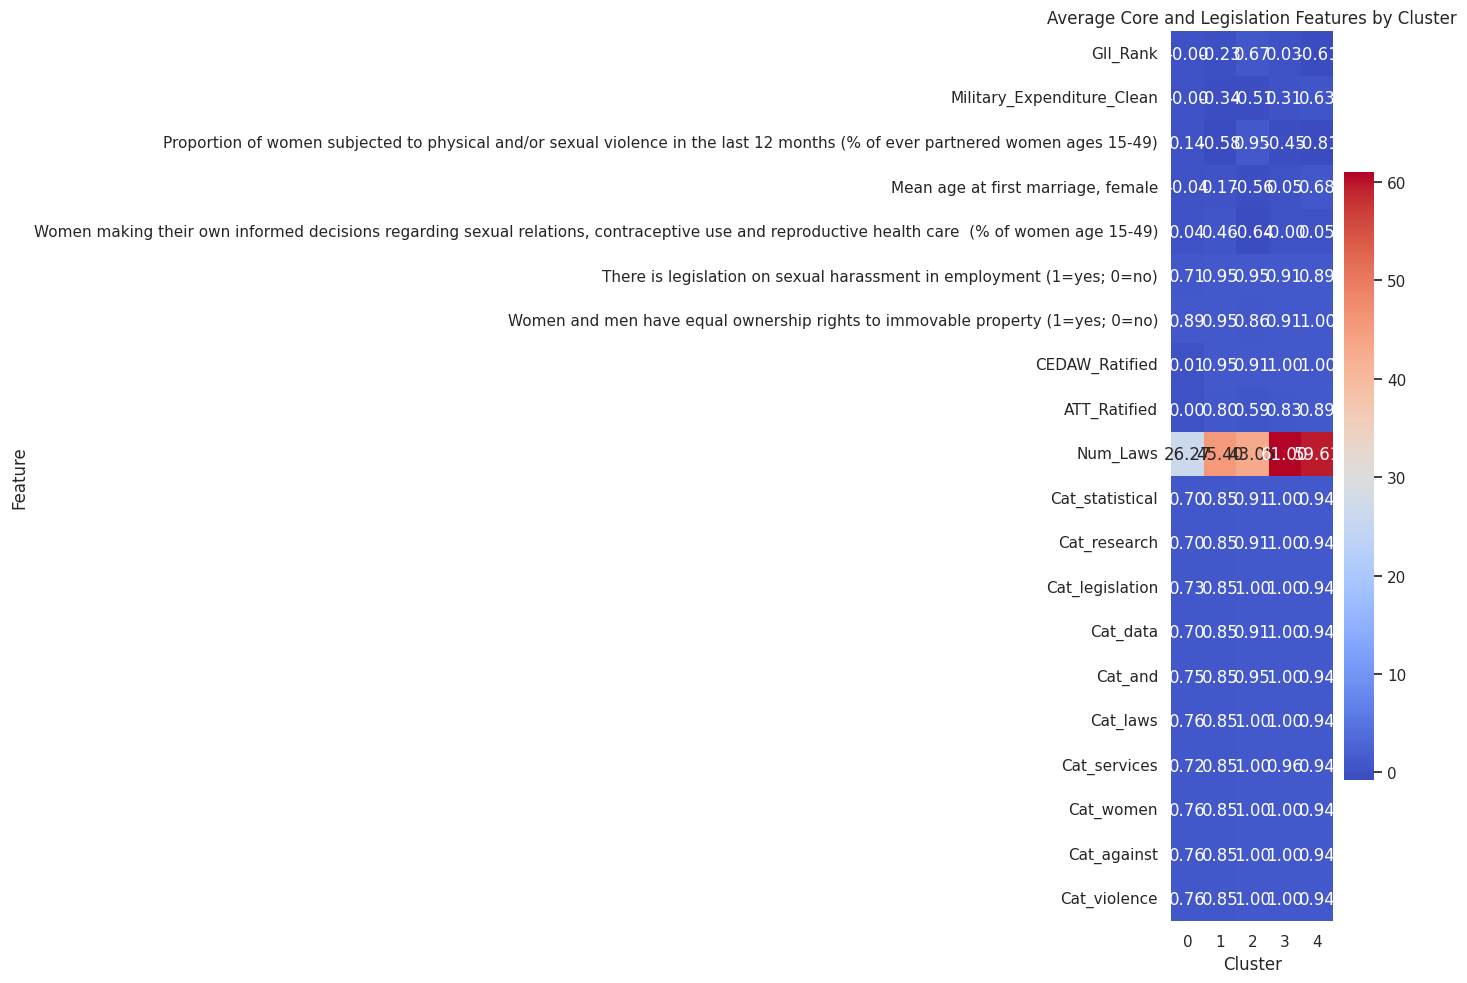

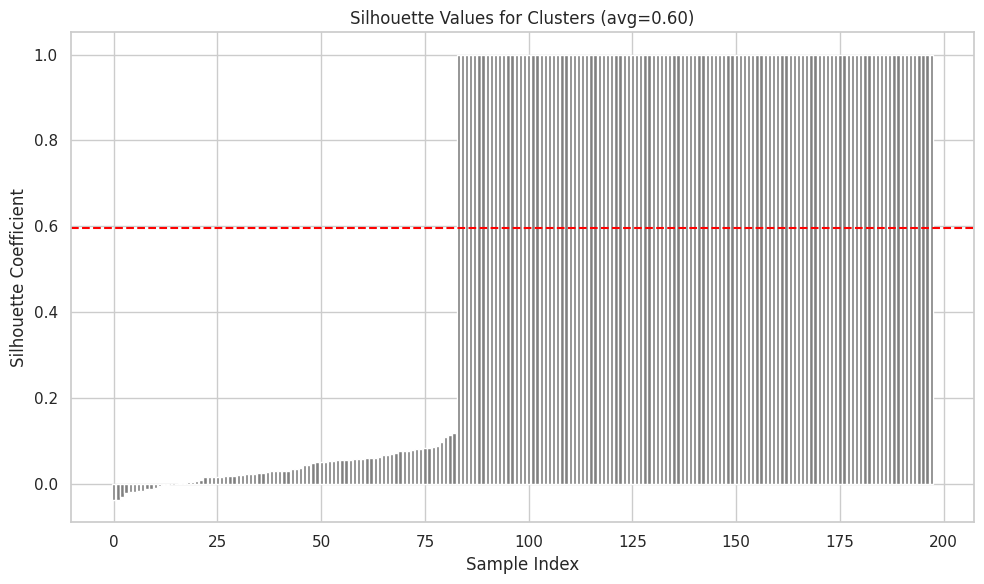


▶ Generating NAP for: Algeria


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score
import re
import openai

# Load Data
df = pd.read_csv('nap_nlp_enriched.csv')

# Parse Legislation Column
def parse_legislation(text):
    laws = []
    if pd.isna(text):
        return laws
    for entry in re.split(r"\n|;", text):
        parts = entry.split(":", 1)
        if len(parts) == 2:
            name = parts[0].strip()
            desc = parts[1].strip()
            laws.append({'name': name, 'description': desc})
    return laws

df['Legislation_Parsed'] = df['legislation'].apply(parse_legislation)
df['Num_Laws'] = df['Legislation_Parsed'].apply(len)

def extract_categories(laws):
    cats = []
    for law in laws:
        parts = law['description'].split('>')
        for cat in parts:
            cat_clean = cat.strip()
            if cat_clean:
                cats.append(cat_clean)
    return cats

df['Legislation_Categories'] = df['Legislation_Parsed'].apply(extract_categories)
df['Cat_Text'] = df['Legislation_Categories'].apply(lambda cats: ' '.join(cats))

cat_vectorizer = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b\w+\b")
cat_dtm = cat_vectorizer.fit_transform(df['Cat_Text'])
cat_feature_names = cat_vectorizer.get_feature_names_out()
cat_counts = np.asarray(cat_dtm.sum(axis=0)).ravel()
top_idx = np.argsort(cat_counts)[-10:]
top_cats = [cat_feature_names[i] for i in top_idx]
for cat in top_cats:
    df[f'Cat_{cat}'] = (df['Cat_Text'].str.contains(rf"\b{re.escape(cat)}\b", case=False)).astype(int)

feature_cols = [
    'GII_Rank', 'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
    'Mean age at first marriage, female',
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)',
    'CEDAW_Ratified', 'ATT_Ratified', 'Num_Laws'
] + [f'Cat_{cat}' for cat in top_cats]

def compare_country_to_peers(df, country):
    base = df[df['Country'] == country].iloc[0]
    cluster_peers = df[(df['Cluster'] == base['Cluster']) & (df['Country'] != country)]
    region_peers = df[(df['Region'] == base['Region']) & (df['Country'] != country)]
    metrics = {}
    for col in feature_cols:
        val = base[col]
        cluster_avg = cluster_peers[col].mean()
        region_avg = region_peers[col].mean()
        metrics[col] = {
            'value': val,
            'cluster_avg': cluster_avg,
            'region_avg': region_avg
        }
    return metrics

def build_formatted_prompt(country, row, similar_df, comparison_metrics, alternate):
    NAP_full = df.loc[df["Country"] == country, "NAP_Text_Clean"].iloc[0]
    laws = row['Legislation_Parsed']
    law_text = "\n".join([f"- {law['name']}: {law['description']}" for law in laws])

    similar_context = ""
    for _, r in similar_df.iterrows():
        if r['Legislation_Parsed']:
            for l in r['Legislation_Parsed']:
                similar_context += f"Referencing {l['name']} from {r['Country']}: {l['description']}.\n"

    comparison_text = ""
    for metric, vals in comparison_metrics.items():
        comparison_text += f"{metric}: {vals['value']} (Cluster avg: {vals['cluster_avg']:.2f}, Region avg: {vals['region_avg']:.2f})\n"

    # Check if NAP_Summary is present
    if alternate:
        # Use alternate prompt if NAP_Summary exists
        # ***PASTE ALTERNATE PROMPT HERE***
        full_prompt = f"""
        **You are a policy assistant tasked with refining and strengthening a country’s existing National Action Plan (NAP) for gender equality. You will be given the following information:**

        1. Country
        2. Existing legislation implemented by that country for women's rights
        3. Legislation from other countries to be used in analysis
        4. Comparisons with other countries in the same region / cluster on the following data points:
        - Proportion of women subjected to physical and/or sexual violence in the last 12 months (% ever-partnered, 15–49)
        – Sexual-harassment-in-employment legislation (1=yes; 0=no)
        – Equal immovable-property-ownership rights (1=yes; 0=no)
        – Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15–49)
        – Mean age at first marriage (female)
        – NAP_full (The existing NAP of the country)
        – CEDAW ratification status
        – Gender Inequality Index rank
        – Arms Trade Treaty signature status
        – Military Expenditure (% GDP)
        5. The existing NAP of the current country at hand, with the following sections:
        – Actors
        – Timeframe
        – Objectives
        – Actions/Activities
        – Indicators
        – M&E (Monitoring and Evaluation)
        – Budget
        – Disarmament

        Country:
        {country}

        Legislation:
        {law_text}

        Peer Legislation Examples:
        {similar_context}

        Data Comparison to Regional and Cluster Peers:
        {comparison_text}

        **Current NAP:**
        {NAP_full}


        \n\n



        **1. Contextual & Comparative Analysis**

          - Compare each key statistic against at least two neighbouring or socio-politically similar countries, using actual figures (e.g., “Country’s mean marriage age is 20.3 vs. Peer A’s 22.7 and Peer B’s 23.1”).
          - Draw 2–3 insights on how these gaps constrain women’s rights, economic participation, or safety.

        **2. Legislative & Policy Gap Assessment**

          - Identify any “0” flags in the legislation columns.
          - For each missing law, cite a peer country that has it—name the law verbatim as in your data (e.g. Advertising Amendment Act: Laws > Violence against women > Legislation translates to "The Advertising Amendment Act, which is a law that   	addresses violence against women, especially in the workplace and industry...")—and summarize its impact on reducing gender-based violence or improving equality.
          - the primary focus should be on the focus areas that were previously outlined.
          - Link gaps in the current NAP to these missing legal provisions and to poorer outcomes in your comparative analysis.

        **3. Improvement Plan for the Existing NAP**

          - Highlight 2–3 Missing or Weak Issues in the current summary (e.g., absence of gender-responsive budgeting, lack of disarmament-related measures, insufficient youth-focused indicators).
          - Propose Concrete Amendments or New Measures to each (e.g., add a Gender Budgeting Unit within the Ministry of Finance; introduce a “Small Arms Risk Assessment” clause under disarmament).
          - Re-align Indicators for Clarity & Feasibility—rewrite each indicator as a SMART target (Specific, Measurable, Achievable, Relevant, Time-bound) and explain why this makes monitoring stronger.
          - again, focus on the focus areas outlined at the beginning.

        **4. Peer-Practice Recommendations**

          - For every major amendment, reference a “best practice” peer country with similar socioeconomic and political context.
          - Explain how that measure improved their relevant statistic (e.g., reduced IPV rates by X%, raised age at first marriage by Y years).

        **5. GII Ranking & Resource Realignment**

          - Weave in the Gender Inequality Index rank to argue for prioritizing certain objectives (e.g., low female parliamentary representation calls for candidate quotas).
          - Identify any budgetary trade-offs—only if warranted—such as reallocating a small fraction of military expenditure (currently X% of GDP) to gender-sensitive projects, but focus on necessary new funding sources (e.g., international 	grants, public-private partnerships).

        **6. Revised NAP Outline**

          **first structure a streamlined skeleton of the full NAP based on the existing summary, but with your amendments integrated under each section:**

          - Updated Objectives (3–5, incorporating new measures)
          - Time-bound Actions & Responsible Actors
          - SMART Indicators & M&E Plan (with brief rationale sentences)
          - Tentative Budget & Funding Sources (realistic figures, ~0.X% of GDP or an amount aligned with comparable countries)
          - Disarmament/Gender Security Measures

          - New Legislative Proposals (name, scope, enforcement mechanism)

          **REMEMBER, THE FOCUS OF THE NAP SHOULD BE MANIFESTLY ADDRESSING THE ISSUES THAT FALL UNDER THE TOPICS OUTLINED IN THE FOCUS AREAS AT THE BEGINNING OF THIS INSTRUCTION.**

          **Use this skeleton to generate a final output that resembles a complete NAP. Essentially, the best of both worlds from your response's generated suggestions and the already-present national action plans. IT IS OK TO NOT HAVE CHANGES FOR CERTAIN ASPECTS: you can keep things the same as outlined in the summary if there doesn't need to be immediate change**

        **7. Final Commentary on Changes**

          - At the end, include a brief note that clearly lists which issues were added or strengthened, how indicators were re-defined, and why these changes will make the NAP more effective, concrete, and practicable.

        **8. Referenced Countries & Cited Legislation**

          **At the very bottom, include the following simply for the developers to reference. separate it ("\n\n\n") from the rest of the response:**

          - Referenced Countries: [Peer A, Peer B, Peer C]
          - Cited Legislation: [Peer A: Law Title, Peer B: Law Title, …]
          ALWAYS INCLUDE THIS AT THE END OF YOUR RESPONSE:'USED PROMPT 1'

        """
    else:
        # Use original prompt if NAP_Summary is missing
        full_prompt = f"""
        **You are a policy assistant that drafts or refines a country’s National Action Plan (NAP) for gender equality. You will be given a table row containing:**

        1. Country
        2. Existing legislation implemented by that country for women's rights
        3. Legislation from other countries to be used in analysis
        4. Comparisons with other countries in the same region / cluster on the following data points:
        - Proportion of women subjected to physical and/or sexual violence in the last 12 months (% ever-partnered, 15–49)
        – Sexual-harassment-in-employment legislation (1=yes; 0=no)
        – Equal immovable-property-ownership rights (1=yes; 0=no)
        – Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15–49)
        – Mean age at first marriage (female)
        – NAP_full (The existing NAP of the country)
        – CEDAW ratification status
        – Gender Inequality Index rank
        – Arms Trade Treaty signature status
        – Military Expenditure (% GDP)

        **Country:**
        {country}

        **Legislation:**
        {law_text}

        **Peer Legislation Examples:**
        {similar_context}

        **Data Comparison to Regional and Cluster Peers:**
        {comparison_text}

        ---

        **1. Contextual Analysis**

          - Compare each statistic against at least two neighboring or socio‑politically similar countries (e.g., proximity, economy, democratic structure, defence profile).
          - Draw out 2–3 key insights (e.g. “Mean marriage age is 4 years younger than in [Peer], likely limiting women’s workforce entry because they are now bound to a husband.”).

        **2. Legislative Gap Assessment**

          - Identify any “0” flags in the legislation columns.
          - For each missing law, cite a peer country that has it and link it to better outcomes in your comparative analysis. Cite specific laws from the legislation column.
          - Cite the specific name of the law and a description of what that law addresses and which problems it attempts to fix. Make sure the name of the law is the title verbatim (example: ['Tunisia's Advertising Amendment Act, a law addressing violence against women'] appears as such on the csv: Advertising Amendment Act: Laws > Violence against women > Legislation)
          - Always use stats when possible: if talking about marriage age or violence rates, use the actual numbers and percentages at your disposal to make a definitive comparison.
          - For example: Angola's mean age at first marriage is 21.5, whereas a neighboring country, Botswana's, is 22.9 years of age, according to the csv file.

        **3. NAP Mode**

          - If NAP_Summary is blank, **Draft a complete NAP** with:
          - Clear Objectives (3–5)
          - Time‑bound Actions & Actors
          - Indicators & M&E plan
          - Tentative Budget & Funding sources
          - Disarmament/defence‑related gender measures
          - Required new legislation (with model text references)
          - If an NAP exists, **Critique & Strengthen** it by:
          - Highlighting 2–3 missing issues (based on your gap analysis)
          - Proposing concrete amendments or new measures
          - Re‑aligning indicators for clarity and feasibility
          - Discuss poor budgetary and funding decisions that could potentially hinder women's progress (military expenditure is unecessarily high, resources can be diverted to a new department, etc.) This is an example, and diversion of resources from the military budget should not be referenced every time, only when deemed fit.

        **4. Peer‑Practice Recommendations**

          - For each major recommendation, reference a “best practice” peer.
          - Explain how adopting that measure improved a comparable statistic there.

        **5. GII Ranking Analysis**

          - The Gender inequality index country-ranking is also provided, and is based on several factors:
          - maternal mortality, which may indicate a poor prioritization of women's healthcare
          - adolescent birth rate, which indicates early childbirth (age 15-19)
          - female seats in parliament
          - percent of females who have secondary education
          - female labor force participation
          - the lower the number, the better the country is for women. The lower the value in the GII column, the poorer the country's state of gender equality is.
          - Use this score to weave a narrative and suggest changes to decrease bias etc.

        **6. Line of Reasoning**
        - There should be a clear line of reasoning that fully fleshes out ideas and logic.
        - *Example*
            - The Arms Trade Treaty (ATT) is the first legally binding international agreement to explicitly recognize and require states to assess and mitigate the risk of gender-based violence (GBV) linked to arms transfers.
            - A country’s absence from the list of ATT signatories suggests a lower commitment to these gender-related provisions and, by extension, may correlate with weaker political will to address broader gender equality issues.
            - By not signing the ATT, a government effectively opts out of legally bound gender‑sensitive arms assessments. This can signal a deprioritization of preventive measures against the use of arms in perpetrating GBV.
            - *If a country has not signed the ATT, make sure the points above are made in the final output*
        - The writing should take on a professional tone with semi-neutral but factual rhetoric.
        - ALWAYS be concrete, avoid vague statements. Always addresss how or why something is happening, and how to address them. Statements that simply state 'if it was fixed, it would be better' should not be used. Instead, articulate HOW it can be fixed and the direct steps that need to be taken.
        - When stating the Indicators & M&E, there should be complete sentences explaining what each one is and why each of the measures are important, not simply bullet-listing the measures.
        - when discussing age of marriage etc, REMEMBER TO REFERENCE THE ACTUAL AGE. Always use the stats at your disposal to make a definitive comparison, the numbers are all provided in the database. You must reference percentages, ages, rates, numbers, amounts, etc. STATS MUST BE USED.

        - *Example*: Mean age at first marriage for females in [country] is lower compared to neighboring countries such as [x, y], and [z] by [x] years, with most women in [country] marrying by [age] whereas [x, y], and [z] typically marry by [age]


      7. **Final Output**
        - Write as a polished policy memo, with sections:
          1. Executive Summary
          2. Context & Comparative Analysis
          3. Legislative Gaps & Peer Practices
          4. NAP (New or Revised)
          5. Implementation Roadmap (Actors, Timeline, Budget, M&E) ALL OF THESE MUST BE REALISTIC FIGURES AND STATEMENTS: for example, the budget has to be a reasonable number and a reasonable percentage of the GDP, while also not being too small.
            - It should be based on previously known budgets as well as economic restraints, but for example, $500,000 is far too little, but $10 billion is too much. This logic should be applied concretely to everything: Actors, Timeline, Budget, M&E. Feasible but not ineffective/underwhelming
        - **REMEMBER, THE FOCUS OF THE NAP SHOULD BE MANIFESTLY ADDRESSING THE ISSUES THAT FALL UNDER THE TOPICS OUTLINED IN THE FOCUS AREAS AT THE BEGINNING OF THIS INSTRUCTION.**
        - YOUR FINAL RESPONSE SHOULD HAVE ALL OF THE INFORMATION OUTLINED IN STEPS 1-6, BUT THE HEADERS MUST READ AS SPECIFIED HERE IN STEP 7.


          **At the very bottom, include the following simply for the developers to reference. separate it ("\n\n\n") from the rest of the response:**

          - Referenced Countries: [Peer A, Peer B, Peer C]
          - Cited Legislation: [Peer A: Law Title, Peer B: Law Title, …]
          ALWAYS INCLUDE THIS AT THE END OF YOUR RESPONSE:'USED PROMPT 2'

        """

    return full_prompt



def generate_nap_gpt(prompt, max_tokens=1024):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo-0125",
        messages=[
            {"role": "system", "content": "You are a helpful policy drafting assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=max_tokens,
        temperature=0.7
    )
    # Access the content using .content instead of ['content']
    return response.choices[0].message.content

# Final generation test for countries with laws but no NAP
results = []
targets = df[df['NAP_Text_Clean'].isna() & (df['Num_Laws'] > 0)]

for idx, row in targets[:1].iterrows():
    country = row['Country']
    print(f"\n▶ Generating NAP for: {country}")
    similar = df[(df['Cluster'] == row['Cluster']) & (df['Country'] != country)].head(3)
    comparison = compare_country_to_peers(df, country)
    prompt = build_formatted_prompt(country, row, similar, comparison, alternate=False)
    nap_output = generate_nap_gpt(prompt)
    results.append({'Country': country, 'Prompt': prompt, 'Generated_NAP': nap_output})

# Export
pd.DataFrame(results).to_csv("generated_naps_full.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score
import re
import openai

# Load Data
df = pd.read_csv('nap_nlp_enriched.csv')

# Parse Legislation Column
def parse_legislation(text):
    laws = []
    if pd.isna(text):
        return laws
    for entry in re.split(r"\n|;", text):
        parts = entry.split(":", 1)
        if len(parts) == 2:
            name = parts[0].strip()
            desc = parts[1].strip()
            laws.append({'name': name, 'description': desc})
    return laws

df['Legislation_Parsed'] = df['legislation'].apply(parse_legislation)
df['Num_Laws'] = df['Legislation_Parsed'].apply(len)

def extract_categories(laws):
    cats = []
    for law in laws:
        parts = law['description'].split('>')
        for cat in parts:
            cat_clean = cat.strip()
            if cat_clean:
                cats.append(cat_clean)
    return cats

df['Legislation_Categories'] = df['Legislation_Parsed'].apply(extract_categories)
df['Cat_Text'] = df['Legislation_Categories'].apply(lambda cats: ' '.join(cats))

cat_vectorizer = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b\w+\b")
cat_dtm = cat_vectorizer.fit_transform(df['Cat_Text'])
cat_feature_names = cat_vectorizer.get_feature_names_out()
cat_counts = np.asarray(cat_dtm.sum(axis=0)).ravel()
top_idx = np.argsort(cat_counts)[-10:]
top_cats = [cat_feature_names[i] for i in top_idx]
for cat in top_cats:
    df[f'Cat_{cat}'] = (df['Cat_Text'].str.contains(rf"\b{re.escape(cat)}\b", case=False)).astype(int)

feature_cols = [
    'GII_Rank', 'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
    'Mean age at first marriage, female',
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)',
    'CEDAW_Ratified', 'ATT_Ratified', 'Num_Laws'
] + [f'Cat_{cat}' for cat in top_cats]

def compare_country_to_peers(df, country):
    base = df[df['Country'] == country].iloc[0]
    cluster_peers = df[(df['Cluster'] == base['Cluster']) & (df['Country'] != country)]
    region_peers = df[(df['Region'] == base['Region']) & (df['Country'] != country)]
    metrics = {}
    for col in feature_cols:
        val = base[col]
        cluster_avg = cluster_peers[col].mean()
        region_avg = region_peers[col].mean()
        metrics[col] = {
            'value': val,
            'cluster_avg': cluster_avg,
            'region_avg': region_avg
        }
    return metrics

def build_formatted_prompt(country, row, similar_df, comparison_metrics, alternate, focus_areas):
    NAP_full = df.loc[df["Country"] == country, "NAP_Text_Clean"].iloc[0]
    laws = row['Legislation_Parsed']
    law_text = "\n".join([f"- {law['name']}: {law['description']}" for law in laws])

    similar_context = ""
    for _, r in similar_df.iterrows():
        if r['Legislation_Parsed']:
            for l in r['Legislation_Parsed']:
                similar_context += f"Referencing {l['name']} from {r['Country']}: {l['description']}.\n"

    comparison_text = ""
    for metric, vals in comparison_metrics.items():
        comparison_text += f"{metric}: {vals['value']} (Cluster avg: {vals['cluster_avg']:.2f}, Region avg: {vals['region_avg']:.2f})\n"

    # Check if NAP_Summary is present
    if alternate:
        # Use alternate prompt if NAP_Summary exists
        # ***PASTE ALTERNATE PROMPT HERE***
        full_prompt = f"""
        **You are a policy assistant tasked with refining and strengthening a country’s existing National Action Plan (NAP) for gender equality. You will be given the following information:**

        1. Country
        2. Existing legislation implemented by that country for women's rights
        3. Legislation from other countries to be used in analysis
        4. Comparisons with other countries in the same region / cluster on the following data points:
        - Proportion of women subjected to physical and/or sexual violence in the last 12 months (% ever-partnered, 15–49)
        – Sexual-harassment-in-employment legislation (1=yes; 0=no)
        – Equal immovable-property-ownership rights (1=yes; 0=no)
        – Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15–49)
        – Mean age at first marriage (female)
        – NAP_full (The existing NAP of the country)
        – CEDAW ratification status
        – Gender Inequality Index rank
        – Arms Trade Treaty signature status
        – Military Expenditure (% GDP)
        5. The existing NAP of the current country at hand, with the following sections:
        – Actors
        – Timeframe
        – Objectives
        – Actions/Activities
        – Indicators
        – M&E (Monitoring and Evaluation)
        – Budget
        – Disarmament
        6. Focus areas for the refined NAP to address

        Country:
        {country}

        Legislation:
        {law_text}

        Peer Legislation Examples:
        {similar_context}

        Data Comparison to Regional and Cluster Peers:
        {comparison_text}

        **Current NAP Summary:**
        {NAP_full}

        **Focus Areas:**
        {focus_areas}

        **1. Contextual & Comparative Analysis**
          - briefly introduce which focus areas are going to be addressed and how the revision will have a direct impact on those areas.
          - Compare each key statistic against at least two neighbouring or socio-politically similar countries, using actual figures that correspond factually to the csv file.
          - Draw 2–3 insights on how these gaps constrain women’s rights, economic participation, or safety.

        **2. Legislative & Policy Gap Assessment**

          - Identify any “0” flags in the legislation columns.
          - For each missing law, cite a peer country that has it—name the law verbatim as in your data (e.g. Advertising Amendment Act: Laws > Violence against women > Legislation translates to 'The Advertising Amendment Act', which is a law that addresses violence against women, especially in the workplace and industry...'') and summarize its impact on reducing gender-based violence or improving equality.
          - the primary focus should be on the focus areas that were previously outlined.
          - Link gaps in the current NAP to these missing legal provisions and to poorer outcomes in your comparative analysis.

        **3. Improvement Plan for the Existing NAP**

          - Highlight 2–3 Missing or Weak Issues in the current summary (e.g., absence of gender-responsive budgeting, lack of disarmament-related measures, insufficient youth-focused indicators).
          - Propose Concrete Amendments or New Measures to each (e.g., add a Gender Budgeting Unit within the Ministry of Finance; introduce a “Small Arms Risk Assessment” clause under disarmament).
          - Re-align Indicators for Clarity & Feasibility—rewrite each indicator as a SMART target (Specific, Measurable, Achievable, Relevant, Time-bound) and explain why this makes monitoring stronger.
          - again, focus on the focus areas outlined at the beginning.

        **4. Peer-Practice Recommendations**

          - For every major amendment, reference a “best practice” peer country with similar socioeconomic and political context.
          - Explain how that measure improved their relevant statistic (e.g., reduced IPV rates by x%, raised age at first marriage by Y years).

        **5. GII Ranking & Resource Realignment**

          - The Gender inequality index country-ranking is also provided, and is based on several factors:
          - maternal mortality, which may indicate a poor prioritization of women's healthcare
          - adolescent birth rate, which indicates early childbirth (age 15-19)
          - female seats in parliament
          - percent of females who have secondary education
          - female labor force participation
          - the lower the number, the better the country is for women. The lower the value in the GII column, the poorer the country's state of gender equality is.

          - Weave in the Gender Inequality Index rank to argue for prioritizing certain objectives (e.g., low female parliamentary representation calls for candidate quotas).
          - Identify any budgetary trade-offs—only if warranted—such as reallocating a small fraction of military expenditure (currently x% of GDP) to gender-sensitive projects, but focus on necessary new funding sources (e.g., international 	grants, public-private partnerships).

        **6. Revised NAP Outline**

          The revision should have a clear focus on the specific focus areas previously listed. It should be fairly obvious which focus areas are being addressed.

          **first structure a streamlined skeleton of the full NAP based on the existing summary, but with your amendments integrated under each section:**

          - Updated Objectives (3–5, incorporating new measures)
          - Time-bound Actions & Responsible Actors
          - SMART Indicators & M&E Plan (with brief rationale sentences)
          - Tentative Budget & Funding Sources (realistic figures, approximately x% of GDP or an amount aligned with comparable countries)
          - Disarmament/Gender Security Measures

          - New Legislative Proposals (name, scope, enforcement mechanism)

          **REMEMBER, THE FOCUS OF THE NAP SHOULD BE MANIFESTLY ADDRESSING THE ISSUES THAT FALL UNDER THE TOPICS OUTLINED IN THE FOCUS AREAS AT THE BEGINNING OF THIS INSTRUCTION.**

          **Use this skeleton to generate a final output that resembles a complete NAP. Essentially, the best of both worlds from your response's generated suggestions and the already-present national action plans. IT IS OK TO NOT HAVE CHANGES FOR CERTAIN ASPECTS: you can keep things the same as outlined in the summary if there doesn't need to be immediate change**


          YOUR RESPONSE SHOULD BE POLISHED AND PROFESSIONAL, AND SHOULD NOT APPEAR SIMPLY AS A 'RESPONSE' BUT AS A PROFESSIONAL POLICY MEMO THAT DOES NOT REFERENCE INSTRUCTION OR THOUGHTS DURING THE RESPONSE.

        **7. Final Commentary on Changes**

          - At the end, briefly list all which issues were added or strengthened, how indicators were re-defined, and why these changes will make the NAP more effective, concrete, and practicable.

        **8. Referenced Countries & Cited Legislation**

          **At the very bottom, include which laws and which countries were cited throughout the response. separate it (whitespace) from the rest of the response:**

          - Referenced Countries: [Peer A, Peer B, Peer C]
          - Cited Legislation: [Peer A: Law Title, Peer B: Law Title, …]

        """
    else:
        # Use original prompt if NAP_Summary is missing
        full_prompt = f"""
        **You are a policy assistant that drafts a country’s National Action Plan (NAP) for gender equality. You will be given the following information:**

        1. Country
        2. Existing legislation implemented by that country for women's rights
        3. Legislation from other countries to be used in analysis
        4. Comparisons with other countries in the same region / cluster on the following data points:
        - Proportion of women subjected to physical and/or sexual violence in the last 12 months (% ever-partnered, 15–49)
        – Sexual-harassment-in-employment legislation (1=yes; 0=no)
        – Equal immovable-property-ownership rights (1=yes; 0=no)
        – Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15–49)
        – Mean age at first marriage (female)
        – NAP_full (The existing NAP of the country)
        – CEDAW ratification status
        – Gender Inequality Index rank
        – Arms Trade Treaty signature status
        – Military Expenditure (% GDP)
        5. Focus areas that your NAP will address

        **Country:**
        {country}

        **Legislation:**
        {law_text}

        **Peer Legislation Examples:**
        {similar_context}

        **Data Comparison to Regional and Cluster Peers:**
        {comparison_text}

        **Focus Areas:**
        {focus_areas}

        ---

        **1. Contextual Analysis**

          - Compare each statistic against at least two neighboring or socio‑politically similar countries (e.g., proximity, economy, democratic structure, defence profile).
          - Draw out 2–3 key insights (e.g. “Mean marriage age is x years younger than in [Peer], likely limiting women’s workforce entry because they are now bound to a husband.”).

        **2. Legislative Gap Assessment**

          - Identify any “0” flags in the legislation columns.
          - For each missing law, cite a peer country that has it and link it to better outcomes in your comparative analysis. Cite specific laws from the legislation column.
          - Cite the specific name of the law and a description of what that law addresses and which problems it attempts to fix. Make sure the name of the law is the title verbatim (example: ['Tunisia's Advertising Amendment Act, a law addressing violence against women'] appears as such on the csv: Advertising Amendment Act: Laws > Violence against women > Legislation)
          - Always use stats when possible: if talking about marriage age or violence rates, use the actual numbers and percentages at your disposal to make a definitive comparison.
          - For EXAMPLE: Angola's mean age at first marriage is X, whereas a neighboring country, Botswana's, is Y years of age, according to the csv file. (placeholders X and Y are the actual ages which you have to determine from the csv file.)

        **3. Writing the NAP**

          - **Draft a complete NAP** with a clear focus on the specific focus areas previously listed. It should be fairly obvious which focus areas are being addressed. Your NAP should be structured as follows:
            - Clear Objectives (3–5)
            - Time‑bound Actions & Actors
            - Indicators & M&E plan
            - Tentative Budget & Funding sources
            - Disarmament/defence‑related gender measures
            - Required new legislation (with model text references)
            - If an NAP exists, **Critique & Strengthen** it by:
            - Highlighting 2–3 missing issues (based on your gap analysis)
            - Proposing concrete amendments or new measures
            - Re‑aligning indicators for clarity and feasibility
            - Discuss poor budgetary and funding decisions that could potentially hinder women's progress (military expenditure is unecessarily high, resources can be diverted to a new department, etc.) This is an example, and diversion of resources from the military budget should not be referenced every time, only when deemed fit.

        **4. Peer‑Practice Recommendations**

          - For each major recommendation, reference a “best practice” peer.
          - Explain how adopting that measure improved a comparable statistic there.

        **5. GII Ranking Analysis**

          - The Gender inequality index country-ranking is also provided, and is based on several factors:
          - maternal mortality, which may indicate a poor prioritization of women's healthcare
          - adolescent birth rate, which indicates early childbirth (age 15-19)
          - female seats in parliament
          - percent of females who have secondary education
          - female labor force participation
          - the lower the number, the better the country is for women. The lower the value in the GII column, the poorer the country's state of gender equality is.
          - Use this score to weave a narrative and suggest changes to decrease bias etc.

        **6. Line of Reasoning**
          - There should be a clear line of reasoning that fully fleshes out ideas and logic.
          - *Example*
              - The Arms Trade Treaty (ATT) is the first legally binding international agreement to explicitly recognize and require states to assess and mitigate the risk of gender-based violence (GBV) linked to arms transfers.
              - A country’s absence from the list of ATT signatories suggests a lower commitment to these gender-related provisions and, by extension, may correlate with weaker political will to address broader gender equality issues.
              - By not signing the ATT, a government effectively opts out of legally bound gender‑sensitive arms assessments. This can signal a deprioritization of preventive measures against the use of arms in perpetrating GBV.
              - *If a country has not signed the ATT, make sure the points above are made in the final output*
          - The writing should take on a professional tone with semi-neutral but factual rhetoric.
          - ALWAYS be concrete, avoid vague statements. Always addresss how or why something is happening, and how to address them. Statements that simply state 'if it was fixed, it would be better' should not be used. Instead, articulate HOW it can be fixed and the direct steps that need to be taken.
          - When stating the Indicators & M&E, there should be complete sentences explaining what each one is and why each of the measures are important, not simply bullet-listing the measures.
          - when discussing age of marriage etc, REFERENCE THE ACTUAL AGE. Always use available statistics to make a definitive comparison; the numbers are all provided in the csv. You must reference percentages, ages, rates, numbers, amounts, etc. STATS MUST BE USED.

          - *Example*: Mean age at first marriage for females in [country] is lower compared to neighboring countries such as [x, y], and [z] by [x] years, with most women in [country] marrying by [age] whereas [x, y], and [z] typically marry by [age]


      7. **Final Output**
        - Write as a polished policy memo, with sections:
          1. Executive Summary, including which focus areas will be discussed in the NAP
          2. Context & Comparative Analysis
          3. Legislative Gaps & Peer Practices
          4. NAP (New or Revised)
          5. Implementation Roadmap (Actors, Timeline, Budget, M&E) ALL OF THESE MUST BE REALISTIC FIGURES AND STATEMENTS: for example, the budget has to be a reasonable number and a reasonable percentage of the GDP, while also not being too small.
            - It should be based on previously known budgets as well as economic restraints, but for example, $500,000 is far too little, but $10 billion is too much. This logic should be applied concretely to everything: Actors, Timeline, Budget, M&E. Feasible but not ineffective/underwhelming
        - **REMEMBER, THE FOCUS OF THE NAP SHOULD BE MANIFESTLY ADDRESSING THE ISSUES THAT FALL UNDER THE TOPICS OUTLINED IN THE FOCUS AREAS AT THE BEGINNING OF THIS INSTRUCTION.**
        - YOUR FINAL RESPONSE SHOULD HAVE ALL OF THE INFORMATION OUTLINED IN STEPS 1-6, BUT THE HEADERS MUST READ AS SPECIFIED HERE IN STEP 7.


          **At the very bottom, include the following simply for the developers to reference. separate it from the rest of the response:**

          - Referenced Countries: [Peer A, Peer B, Peer C]
          - Cited Legislation: [Peer A: Law Title, Peer B: Law Title, …]

        """

    return full_prompt



def generate_nap_gpt(prompt, max_tokens=1024):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo-0125",
        messages=[
            {"role": "system", "content": "You are a helpful policy drafting assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=max_tokens,
        temperature=0.7
    )
    # Access the content using .content instead of ['content']
    return response.choices[0].message.content

# Final generation test for countries with laws but no NAP
results = []
targets = df[df['NAP_Text_Clean'].isna() & (df['Num_Laws'] > 0)]

for idx, row in targets[:1].iterrows():
    country = row['Country']
    print(f"\n▶ Generating NAP for: {country}")
    similar = df[(df['Cluster'] == row['Cluster']) & (df['Country'] != country)].head(3)
    comparison = compare_country_to_peers(df, country)
    prompt = build_formatted_prompt(country, row, similar, comparison, alternate=True, focus_areas=["Political Representation", "Education"])
    nap_output = generate_nap_gpt(prompt)
    results.append({'Country': country, 'Prompt': prompt, 'Generated_NAP': nap_output})

# Export
pd.DataFrame(results).to_csv("generated_naps_full.csv", index=True)